In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Configuring default setting to display all the rows and columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
# loading dataset
transaction = pd.read_excel('KPMG_update_final.xlsx', sheet_name='Transactions', header=1)
demographic = pd.read_excel('KPMG_update_final.xlsx', sheet_name='CustomerDemographic', header=1)
address = pd.read_excel('KPMG_update_final.xlsx', sheet_name='CustomerAddress', header=1)
New_customer = pd.read_excel('KPMG_update_final.xlsx', sheet_name='NewCustomerList', header=1)

In [4]:
transaction.head()

transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date  
0       71.49          53.62                  41245.0  
1     2091.47         388.92                  41701.0  
2     1793.43         248.82                  36361.0  
3     1198.46         381.10                  36145.0  
4     1765.30         709.48                  42226.0

In [5]:
demographic.head()

customer_id      first_name  last_name  gender  \
0            1         Laraine  Medendorp       F   
1            2             Eli    Bockman    Male   
2            3           Arlin     Dearle    Male   
3            4          Talbot        NaN    Male   
4            5  Sheila-kathryn     Calton  Female   

   past_3_years_bike_related_purchases        DOB               job_title  \
0                                   93 1953-10-12     Executive Secretary   
1                                   81 1980-12-16  Administrative Officer   
2                                   61 1954-01-20      Recruiting Manager   
3                                   33 1961-10-03                     NaN   
4                                   56 1977-05-13           Senior Editor   

  job_industry_category     wealth_segment deceased_indicator  \
0                Health      Mass Customer                  N   
1    Financial Services      Mass Customer                  N   
2              Property      Mass Customer                  N   
3                    IT      Mass Customer                  N   
4                   NaN  Affluent Customer                  N   

                                             default owns_car  tenure  
0                                                 "'      Yes    11.0  
1                       <script>alert('hi')</script>      Yes    16.0  
2                                2018-02-01 00:00:00      Yes    15.0  
3  () { _; } >_[$($())] { touch /tmp/blns.shellsh...       No     7.0  
4                                                NIL      Yes     8.0

In [6]:
address.head()

customer_id              address  postcode            state    country  \
0            1   060 Morning Avenue      2016  New South Wales  Australia   
1            2  6 Meadow Vale Court      2153  New South Wales  Australia   
2            4   0 Holy Cross Court      4211              QLD  Australia   
3            5  17979 Del Mar Point      2448  New South Wales  Australia   
4            6     9 Oakridge Court      3216              VIC  Australia   

   property_valuation  
0                  10  
1                  10  
2                   9  
3                   4  
4                   9

In [7]:
New_customer.head()

first_name  last_name  gender  past_3_years_bike_related_purchases  \
0    Chickie    Brister    Male                                   86   
1      Morly     Genery    Male                                   69   
2    Ardelis  Forrester  Female                                   10   
3     Lucine      Stutt  Female                                   64   
4    Melinda     Hadlee  Female                                   34   

         DOB                   job_title job_industry_category  \
0 1957-07-12             General Manager         Manufacturing   
1 1970-03-22         Structural Engineer              Property   
2 1974-08-28      Senior Cost Accountant    Financial Services   
3 1979-01-28  Account Representative III         Manufacturing   
4 1965-09-21           Financial Analyst    Financial Services   

      wealth_segment deceased_indicator owns_car  tenure              address  \
0      Mass Customer                  N      Yes      14     45 Shopko Center   
1      Mass Customer                  N       No      16    14 Mccormick Park   
2  Affluent Customer                  N       No      10  5 Colorado Crossing   
3  Affluent Customer                  N      Yes       5   207 Annamark Plaza   
4  Affluent Customer                  N       No      19    115 Montana Place   

   postcode state    country  property_valuation  Unnamed: 16  Unnamed: 17  \
0      4500   QLD  Australia                   6         0.94       1.1750   
1      2113   NSW  Australia                  11         0.53       0.5300   
2      3505   VIC  Australia                   5         0.61       0.6100   
3      4814   QLD  Australia                   1         0.81       1.0125   
4      2093   NSW  Australia                   9         0.57       0.5700   

   Unnamed: 18  Unnamed: 19  Unnamed: 20  Rank     Value  
0      1.46875     1.248437            1     1  1.718750  
1      0.66250     0.563125            1     1  1.718750  
2      0.61000     0.610000            1     1  1.718750  
3      1.01250     1.012500            4     4  1.703125  
4      0.71250     0.712500            4     4  1.703125

# Merging all 3 dataset into one

In [8]:
df = pd.merge(demographic, transaction, how='inner', on='customer_id')
df = pd.merge(df, address, how= 'inner', on='customer_id')
df.head()

customer_id first_name  last_name gender  \
0            1    Laraine  Medendorp      F   
1            1    Laraine  Medendorp      F   
2            1    Laraine  Medendorp      F   
3            1    Laraine  Medendorp      F   
4            1    Laraine  Medendorp      F   

   past_3_years_bike_related_purchases        DOB            job_title  \
0                                   93 1953-10-12  Executive Secretary   
1                                   93 1953-10-12  Executive Secretary   
2                                   93 1953-10-12  Executive Secretary   
3                                   93 1953-10-12  Executive Secretary   
4                                   93 1953-10-12  Executive Secretary   

  job_industry_category wealth_segment deceased_indicator default owns_car  \
0                Health  Mass Customer                  N      "'      Yes   
1                Health  Mass Customer                  N      "'      Yes   
2                Health  Mass Customer                  N      "'      Yes   
3                Health  Mass Customer                  N      "'      Yes   
4                Health  Mass Customer                  N      "'      Yes   

   tenure  transaction_id  product_id transaction_date  online_order  \
0    11.0              94          86       2017-12-23           0.0   
1    11.0            3765          38       2017-04-06           1.0   
2    11.0            5157          47       2017-05-11           1.0   
3    11.0            9785          72       2017-01-05           0.0   
4    11.0           13424           2       2017-02-21           0.0   

  order_status           brand product_line product_class product_size  \
0     Approved      OHM Cycles     Standard        medium       medium   
1     Approved           Solex     Standard        medium       medium   
2     Approved   Trek Bicycles         Road           low        small   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved           Solex     Standard        medium       medium   

   list_price  standard_cost  product_first_sold_date             address  \
0      235.63         125.07                  38482.0  060 Morning Avenue   
1     1577.53         826.51                  39526.0  060 Morning Avenue   
2     1720.70        1531.42                  37823.0  060 Morning Avenue   
3      360.40         270.30                  37873.0  060 Morning Avenue   
4       71.49          53.62                  38573.0  060 Morning Avenue   

   postcode            state    country  property_valuation  
0      2016  New South Wales  Australia                  10  
1      2016  New South Wales  Australia                  10  
2      2016  New South Wales  Australia                  10  
3      2016  New South Wales  Australia                  10  
4      2016  New South Wales  Australia                  10

# Independent and dependent variables

In [9]:
# Separating target variable from independent variable  
target_columns = [var for var in df.columns if var not in New_customer.columns]
target_columns

['customer_id',
 'default',
 'transaction_id',
 'product_id',
 'transaction_date',
 'online_order',
 'order_status',
 'brand',
 'product_line',
 'product_class',
 'product_size',
 'list_price',
 'standard_cost',
 'product_first_sold_date']

In [10]:
# independent variables 
independent_attribute = [var for var in df.columns if var not in target_columns]
independent_attribute

['first_name',
 'last_name',
 'gender',
 'past_3_years_bike_related_purchases',
 'DOB',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'deceased_indicator',
 'owns_car',
 'tenure',
 'address',
 'postcode',
 'state',
 'country',
 'property_valuation']

# Missing values imputation

In [11]:
# Percentage of missing values in the independent variables 
df[independent_attribute].isnull().mean()*100

first_name                              0.000000
last_name                               3.215144
gender                                  0.000000
past_3_years_bike_related_purchases     0.000000
DOB                                     2.233574
job_title                              11.914062
job_industry_category                  16.135817
wealth_segment                          0.000000
deceased_indicator                      0.000000
owns_car                                0.000000
tenure                                  2.233574
address                                 0.000000
postcode                                0.000000
state                                   0.000000
country                                 0.000000
property_valuation                      0.000000
dtype: float64

In [12]:
missing_values = [var for var in independent_attribute if df[var].isnull().any()]
missing_values

['last_name', 'DOB', 'job_title', 'job_industry_category', 'tenure']

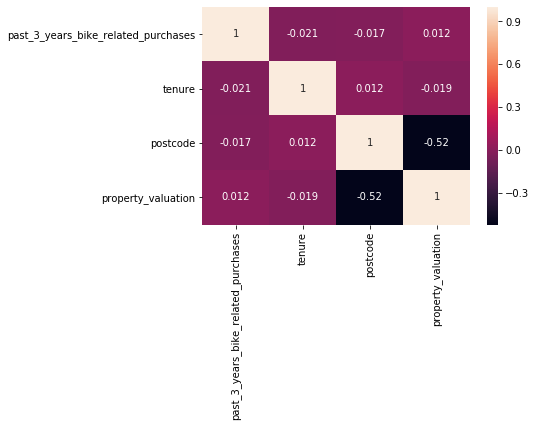

In [13]:
sns.heatmap(df[independent_attribute].corr(), annot=True)

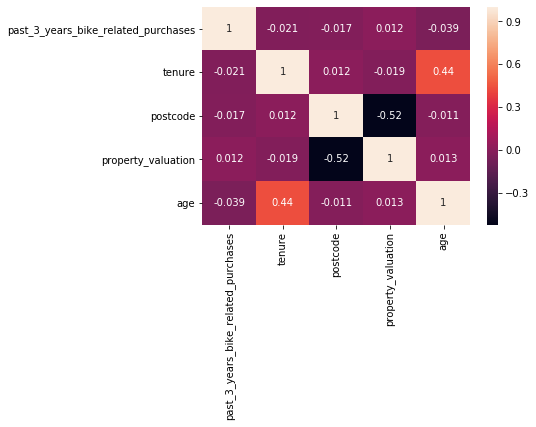

In [14]:
df['birth_year'] = pd.DatetimeIndex(df.DOB).year
df['age'] = 2020-df['birth_year']
independent_attribute.append('age')
sns.heatmap(df[independent_attribute].corr(), annot=True)

We can see some relation between age and tenure

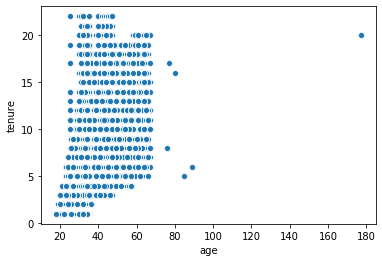

In [15]:
sns.scatterplot(df.age, df.tenure)

In [16]:
print('No of records missing in tenure',df[df.tenure.isnull()].shape[0])
print('No of records missing in age',df[df.age.isnull()].shape[0])
print('No of records missing in both age and tenure',df[df.tenure.isnull() & df.age.isnull()].shape[0])

No of records missing in tenure 446
No of records missing in age 446
No of records missing in both age and tenure 446


In [17]:
# replacing missing values in age and tenure columns with 0
def fill_num(data, list):
    for var in list:
        data[var] = data[var].fillna(0)
        
fill_num(df, ['tenure', 'age'])

Since the percentage of missing data is high in columns job_title and job_industry_category. So we have to put an indicator of missing values so that we can preserve valuable information.

In [18]:
# replacing missing values in job_title and job_industry_category columns with 'missing' label
def fill_cat(data, list):
    for var in list:
        data[var] = data[var].fillna('missing')
        
fill_cat(df, ['job_title', 'job_industry_category'])

In [19]:
# Percentage of missing values in the target variables 
df[target_columns].isnull().mean()*100

customer_id                0.000000
default                    7.266627
transaction_id             0.000000
product_id                 0.000000
transaction_date           0.000000
online_order               1.797877
order_status               0.000000
brand                      0.976562
product_line               0.976562
product_class              0.976562
product_size               0.976562
list_price                 0.000000
standard_cost              0.976562
product_first_sold_date    0.976562
dtype: float64

Now before deleting the records having missing values. We have to drop out default column because:

- The values are unexplainable
- The missing values contained is 7.27 percentage which is greater than missing data percentage present in DOB column.

In [20]:
df.drop('default', axis=1, inplace=True)
target_columns = target_columns[2:]
df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'address', 'postcode',
       'state', 'country', 'property_valuation', 'birth_year', 'age'],
      dtype='object')

In [21]:
# Droping records which is having missing values in target variables
df = df.dropna(axis=0, subset=target_columns)
df[target_columns].isnull().any()

transaction_id             False
product_id                 False
transaction_date           False
online_order               False
order_status               False
brand                      False
product_line               False
product_class              False
product_size               False
list_price                 False
standard_cost              False
product_first_sold_date    False
dtype: bool

# Feature engineering for some of the target columns

In [22]:
target_columns = target_columns[2:]
target_columns

['transaction_date',
 'online_order',
 'order_status',
 'brand',
 'product_line',
 'product_class',
 'product_size',
 'list_price',
 'standard_cost',
 'product_first_sold_date']

In [23]:
df['year'] = pd.DatetimeIndex(df.transaction_date).year
df['month'] = pd.DatetimeIndex(df.transaction_date).month
df['weekday'] = pd.DatetimeIndex(df.transaction_date).weekday

for var in ['year', 'month', 'weekday']:
    target_columns.append(var)
    
df[target_columns].head()

transaction_date  online_order order_status           brand product_line  \
0       2017-12-23           0.0     Approved      OHM Cycles     Standard   
1       2017-04-06           1.0     Approved           Solex     Standard   
2       2017-05-11           1.0     Approved   Trek Bicycles         Road   
3       2017-01-05           0.0     Approved  Norco Bicycles     Standard   
4       2017-02-21           0.0     Approved           Solex     Standard   

  product_class product_size  list_price  standard_cost  \
0        medium       medium      235.63         125.07   
1        medium       medium     1577.53         826.51   
2           low        small     1720.70        1531.42   
3        medium       medium      360.40         270.30   
4        medium       medium       71.49          53.62   

   product_first_sold_date  year  month  weekday  
0                  38482.0  2017     12        5  
1                  39526.0  2017      4        3  
2                  37823.0  2017      5        3  
3                  37873.0  2017      1        3  
4                  38573.0  2017      2        1

In [24]:
for var in df[target_columns].columns:
    print(var,'->',df[var].nunique())

transaction_date -> 364
online_order -> 2
order_status -> 2
brand -> 6
product_line -> 4
product_class -> 3
product_size -> 3
list_price -> 100
standard_cost -> 100
product_first_sold_date -> 100
year -> 1
month -> 12
weekday -> 7


In [25]:
target_columns = target_columns[1:]
target_columns

['online_order',
 'order_status',
 'brand',
 'product_line',
 'product_class',
 'product_size',
 'list_price',
 'standard_cost',
 'product_first_sold_date',
 'year',
 'month',
 'weekday']

In [26]:
target_columns = ['online_order',
 'order_status',
 'brand',
 'product_line',
 'product_class',
 'product_size',
 'list_price',
 'standard_cost',
 'product_first_sold_date',
 'month',
 'weekday']

In [27]:
target_num = [var for var in target_columns if df[var].dtypes != 'object']
target_cat = [var for var in target_columns if df[var].dtypes == 'object']

target_num, target_cat

(['online_order',
  'list_price',
  'standard_cost',
  'product_first_sold_date',
  'month',
  'weekday'],
 ['order_status', 'brand', 'product_line', 'product_class', 'product_size'])

# Independent Numeric variables

In [28]:
num_indp_var = [var for var in independent_attribute if df[var].dtypes != 'object']
num_indp_var

['past_3_years_bike_related_purchases',
 'DOB',
 'tenure',
 'postcode',
 'property_valuation',
 'age']

In [29]:
num_indp_var = ['past_3_years_bike_related_purchases',
 'tenure',
 'postcode',
 'property_valuation',
 'age']

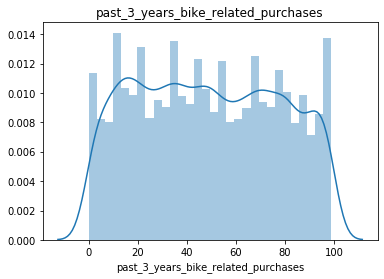

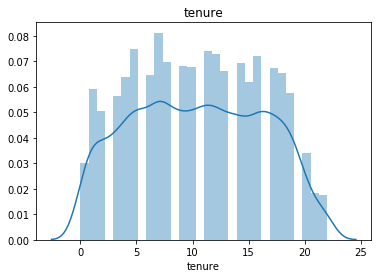

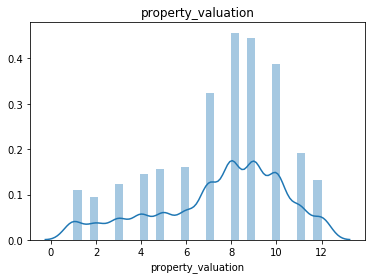

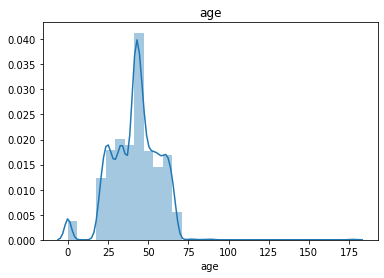

In [30]:
# Distribution of numeric varaibles 
for var in ['past_3_years_bike_related_purchases', 'tenure', 'property_valuation', 'age']:
    sns.distplot(df[var], bins=30)
    plt.title(var)
    plt.show()

- property_valuation distribution is slightly negative skewed
- We have an outlier in age column and the distribution is positive skewed

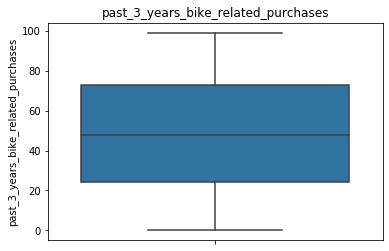

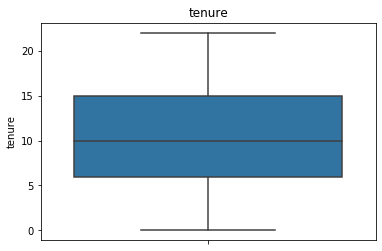

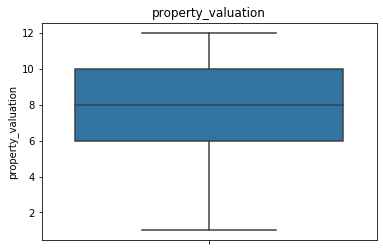

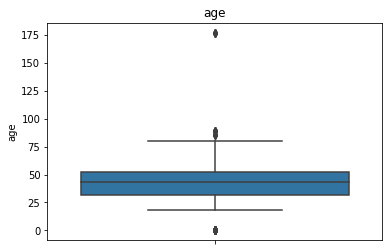

In [31]:
# Boxplot of numeric varaibles 
for var in ['past_3_years_bike_related_purchases', 'tenure', 'property_valuation', 'age']:
    sns.boxplot(y = df[var])
    plt.title(var)
    plt.show()

As observed, age column is showing an outlier.

In [32]:
# outlier in age column
df[df.age > 100]

customer_id first_name last_name gender  \
171           34   Jephthah  Bachmann      U   
172           34   Jephthah  Bachmann      U   
173           34   Jephthah  Bachmann      U   
174           34   Jephthah  Bachmann      U   
175           34   Jephthah  Bachmann      U   
176           34   Jephthah  Bachmann      U   
178           34   Jephthah  Bachmann      U   
179           34   Jephthah  Bachmann      U   

     past_3_years_bike_related_purchases        DOB        job_title  \
171                                   59 1843-12-21  Legal Assistant   
172                                   59 1843-12-21  Legal Assistant   
173                                   59 1843-12-21  Legal Assistant   
174                                   59 1843-12-21  Legal Assistant   
175                                   59 1843-12-21  Legal Assistant   
176                                   59 1843-12-21  Legal Assistant   
178                                   59 1843-12-21  Legal Assistant   
179                                   59 1843-12-21  Legal Assistant   

    job_industry_category     wealth_segment deceased_indicator owns_car  \
171                    IT  Affluent Customer                  N       No   
172                    IT  Affluent Customer                  N       No   
173                    IT  Affluent Customer                  N       No   
174                    IT  Affluent Customer                  N       No   
175                    IT  Affluent Customer                  N       No   
176                    IT  Affluent Customer                  N       No   
178                    IT  Affluent Customer                  N       No   
179                    IT  Affluent Customer                  N       No   

     tenure  transaction_id  product_id transaction_date  online_order  \
171    20.0            1039           8       2017-07-01           1.0   
172    20.0            1107          15       2017-08-22           0.0   
173    20.0            2638          83       2017-04-07           0.0   
174    20.0            9044          12       2017-02-13           0.0   
175    20.0            9792          60       2017-06-25           1.0   
176    20.0           12083          13       2017-07-23           0.0   
178    20.0           17808          96       2017-04-10           1.0   
179    20.0           19291          65       2017-09-19           0.0   

    order_status           brand product_line product_class product_size  \
171     Approved           Solex         Road        medium        small   
172     Approved  Norco Bicycles     Standard           low       medium   
173     Approved           Solex      Touring        medium        large   
174     Approved        WeareA2B     Standard        medium       medium   
175     Approved  Giant Bicycles     Standard          high        small   
176     Approved           Solex     Standard        medium       medium   
178     Approved        WeareA2B         Road           low        small   
179     Approved        WeareA2B     Standard        medium       medium   

     list_price  standard_cost  product_first_sold_date         address  \
171     1703.52        1516.13                  40649.0  833 Luster Way   
172      958.74         748.90                  38693.0  833 Luster Way   
173     2083.94         675.03                  41533.0  833 Luster Way   
174     1231.15         161.60                  38216.0  833 Luster Way   
175     1977.36        1759.85                  40779.0  833 Luster Way   
176     1163.89         589.27                  42560.0  833 Luster Way   
178     1172.78        1043.77                  37539.0  833 Luster Way   
179     1807.45         778.69                  42145.0  833 Luster Way   

     postcode state    country  property_valuation  birth_year    age  year  \
171      4005   QLD  Australia                   8      1843.0  177.0  2017   
172      4005   QLD  Australia                   8  

In [33]:
df.groupby('property_valuation')['age'].mean()

property_valuation
1     42.402299
2     41.343844
3     41.308219
4     42.092308
5     41.359206
6     40.784588
7     41.792535
8     42.178154
9     42.970069
10    40.887722
11    43.342105
12    41.795551
Name: age, dtype: float64

In [34]:
age = df.groupby('property_valuation')['age'].mean()[8].round()
age

42.0

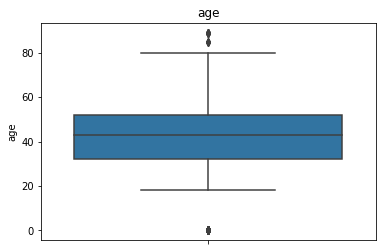

In [35]:
df['age'] = np.where(df['age'] == 177, age, df['age'])
sns.boxplot(y = df['age'])
plt.title('age')
plt.show()

In [36]:
variables = print('numeric independent variable:', num_indp_var, '\n',
                  'target categorical variable:', target_cat, '\n',
                  'target numeric variable:', target_num)

numeric independent variable: ['past_3_years_bike_related_purchases', 'tenure', 'postcode', 'property_valuation', 'age'] 
 target categorical variable: ['order_status', 'brand', 'product_line', 'product_class', 'product_size'] 
 target numeric variable: ['online_order', 'list_price', 'standard_cost', 'product_first_sold_date', 'month', 'weekday']


In [37]:
def indepNum_targetCat(num_var, cat_var, df):
    print(str(num_var)+' vs '+str(cat_var))
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (15,4))
    
    # Mean
    chart1 = sns.barplot(x=df[cat_var], y=df[num_var], ax = axes[0])
    chart1.set_title('Mean')
    chart1.set_xticklabels(chart1.get_xticklabels(), rotation = 45)
    
    # Median
    index = df.groupby(cat_var)[num_var].median().index
    values = df.groupby(cat_var)[num_var].median().values
    chart2 = sns.barplot(x=index, y=values, ax=axes[1])
    chart2.set_title('Median')
    chart2.set_xticklabels(chart1.get_xticklabels(), rotation = 45)
    
    # Count
    chart3 = sns.countplot(df[cat_var], ax = axes[2])
    chart3.set_title('Count')
    chart3.set_xticklabels(chart1.get_xticklabels(), rotation = 45)

    plt.show()

past_3_years_bike_related_purchases vs order_status


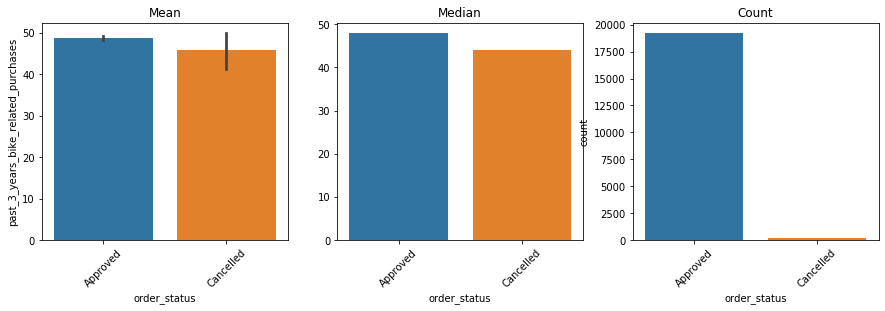

past_3_years_bike_related_purchases vs brand


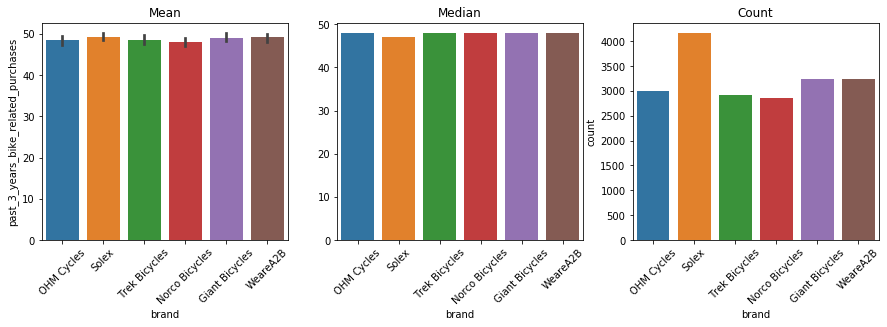

past_3_years_bike_related_purchases vs product_line


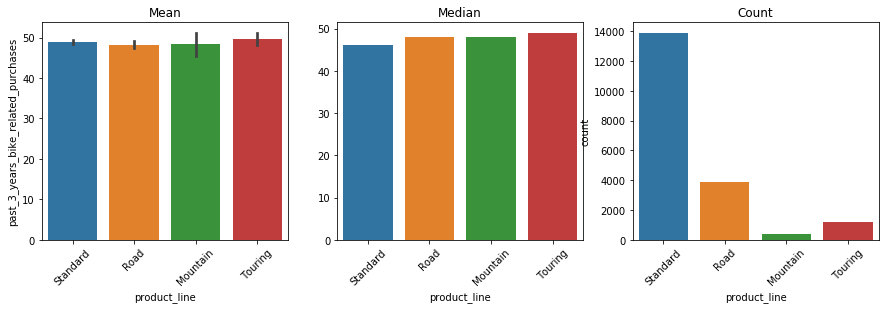

past_3_years_bike_related_purchases vs product_class


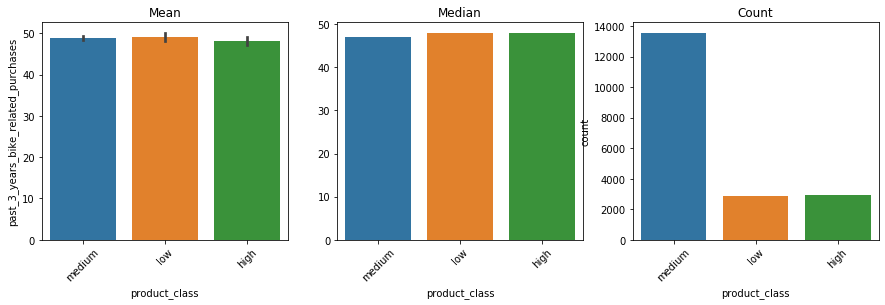

past_3_years_bike_related_purchases vs product_size


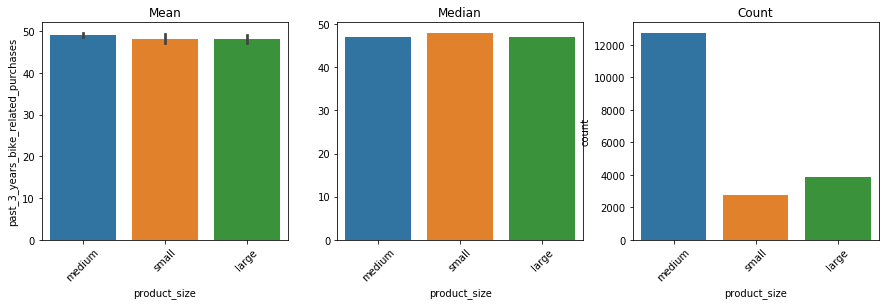

tenure vs order_status


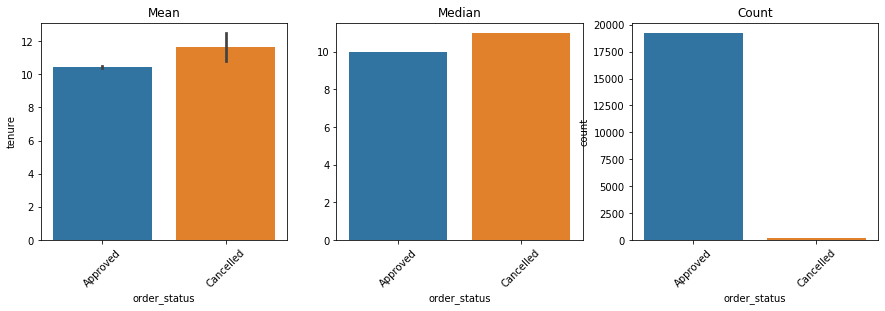

tenure vs brand


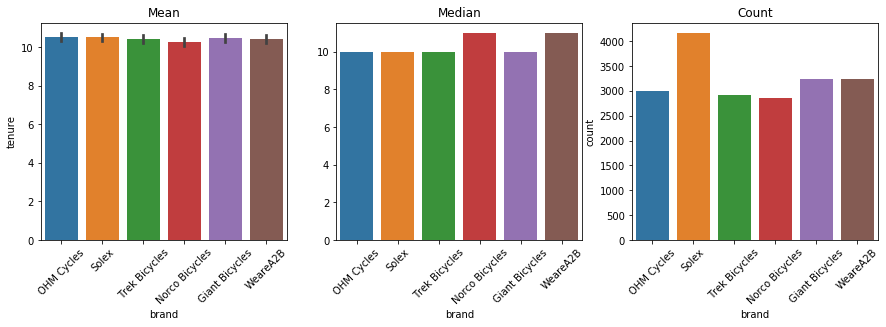

tenure vs product_line


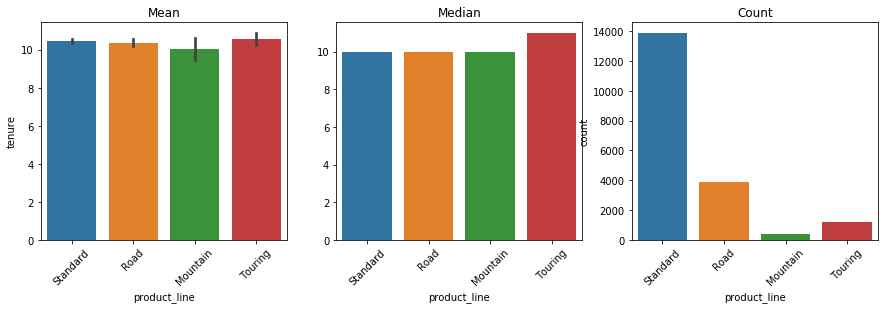

tenure vs product_class


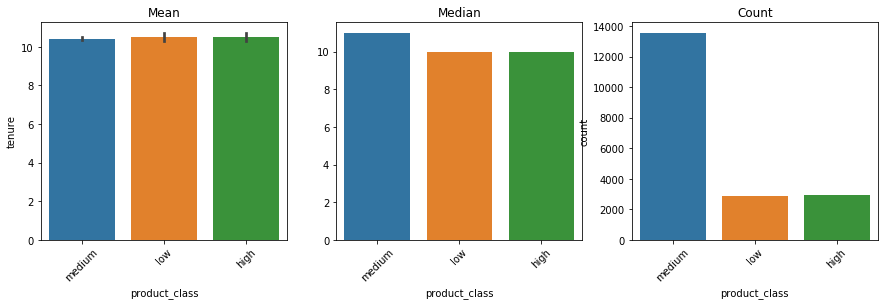

tenure vs product_size


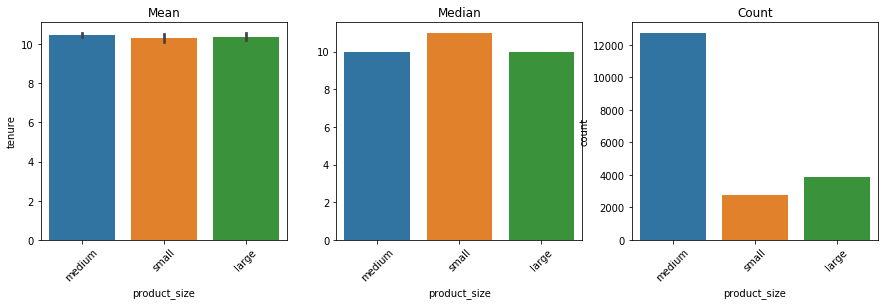

postcode vs order_status


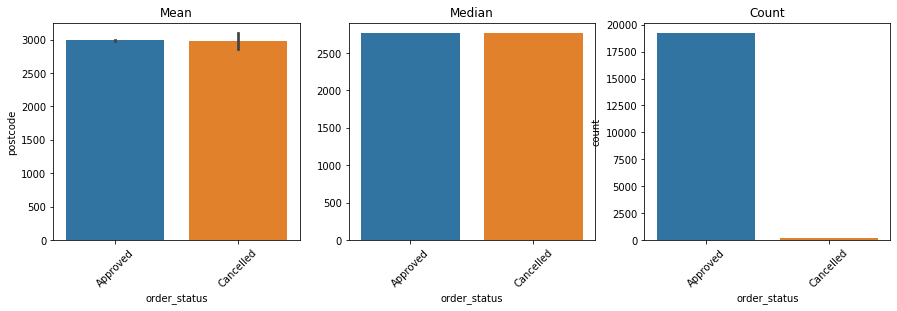

postcode vs brand


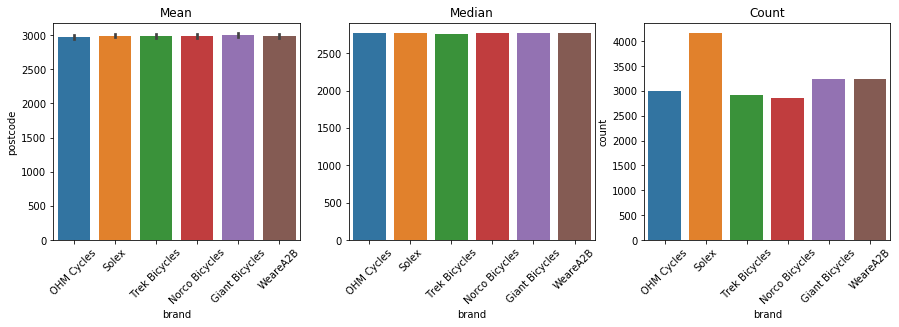

postcode vs product_line


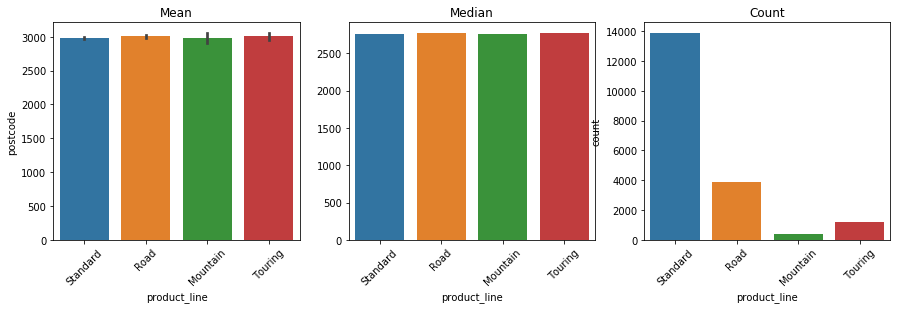

postcode vs product_class


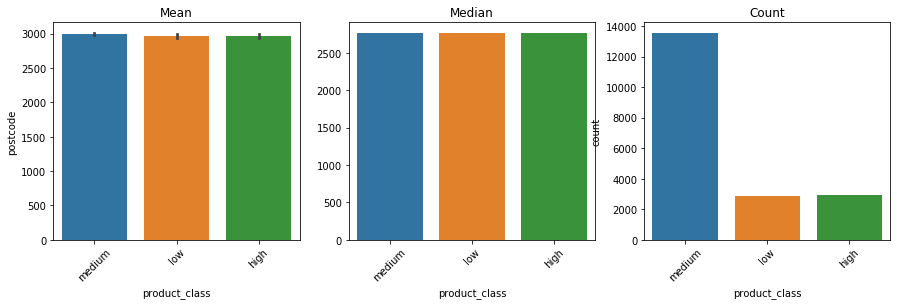

postcode vs product_size


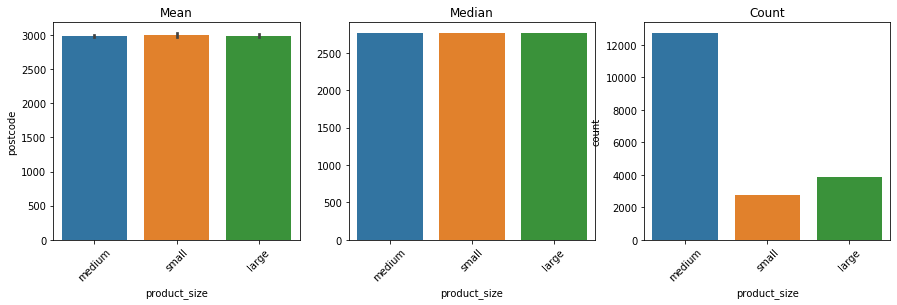

property_valuation vs order_status


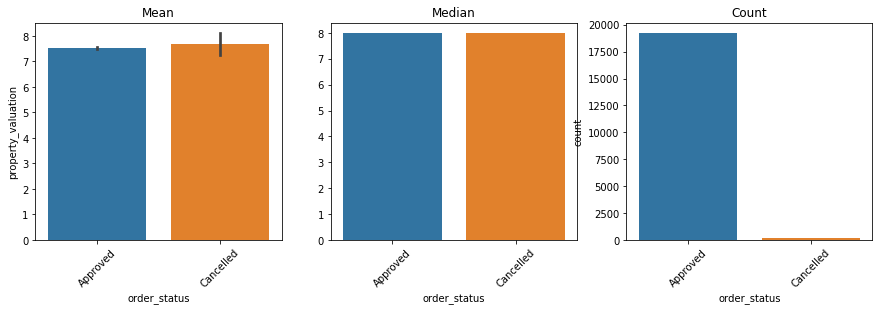

property_valuation vs brand


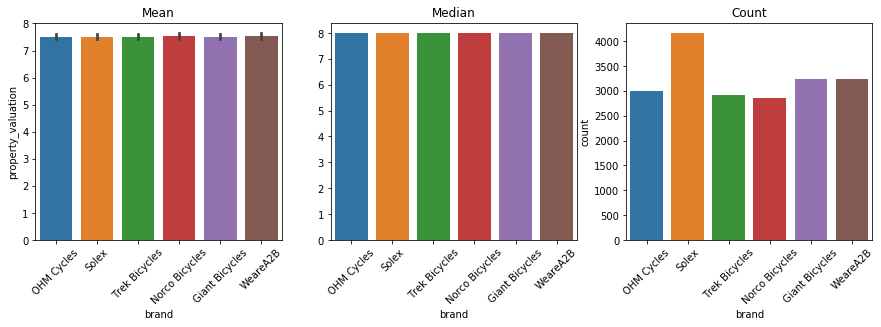

property_valuation vs product_line


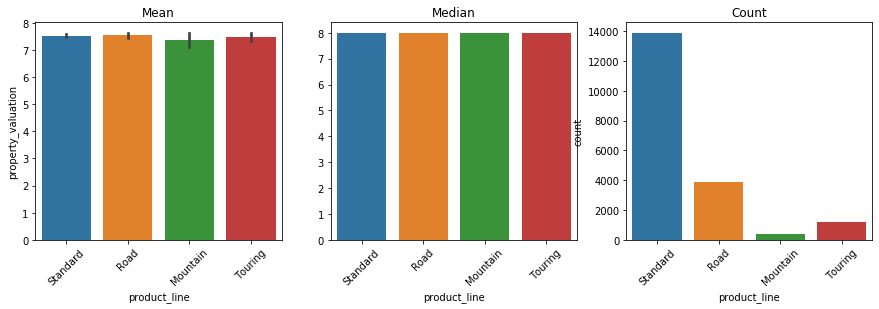

property_valuation vs product_class


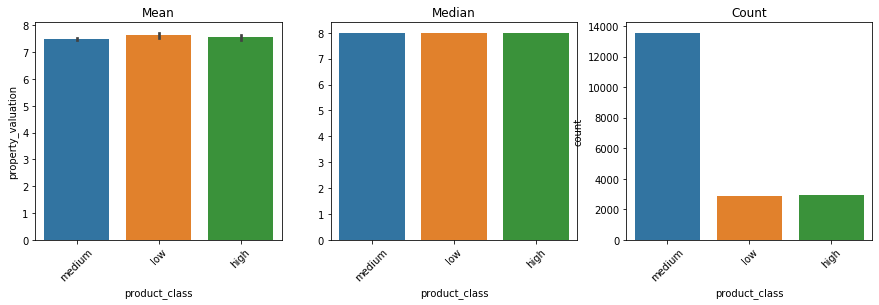

property_valuation vs product_size


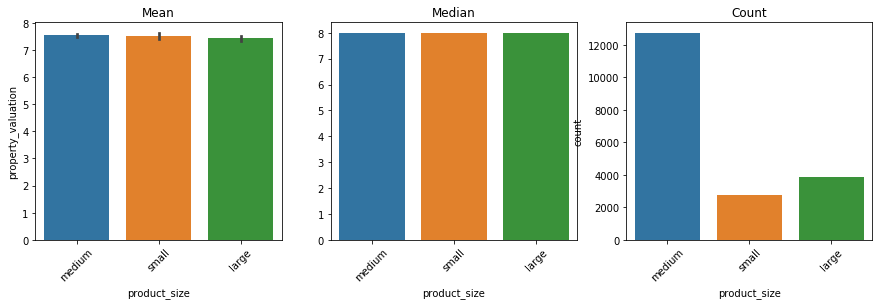

age vs order_status


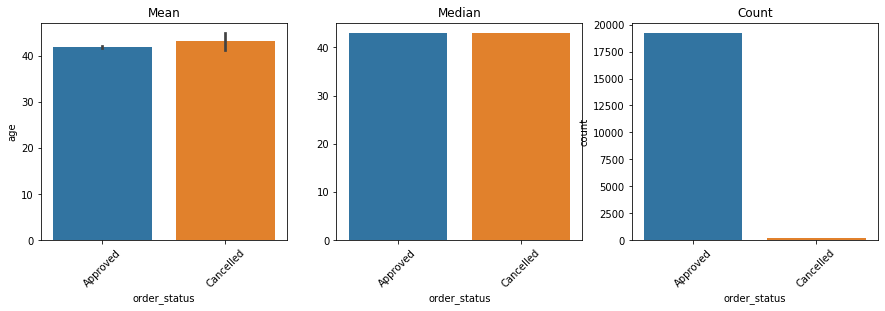

age vs brand


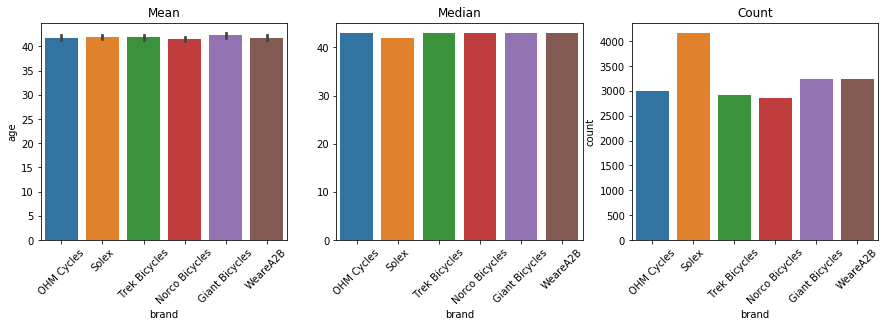

age vs product_line


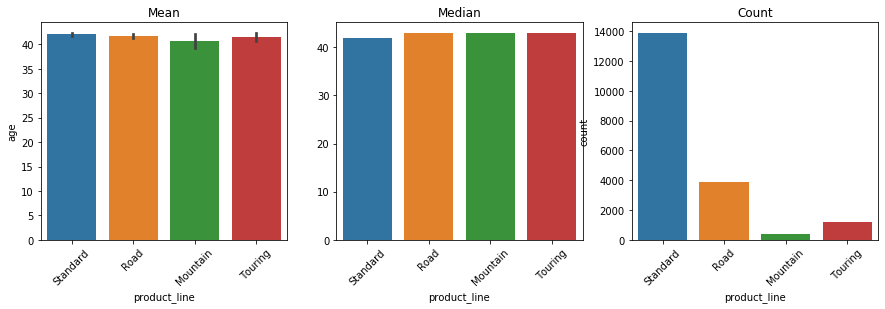

age vs product_class


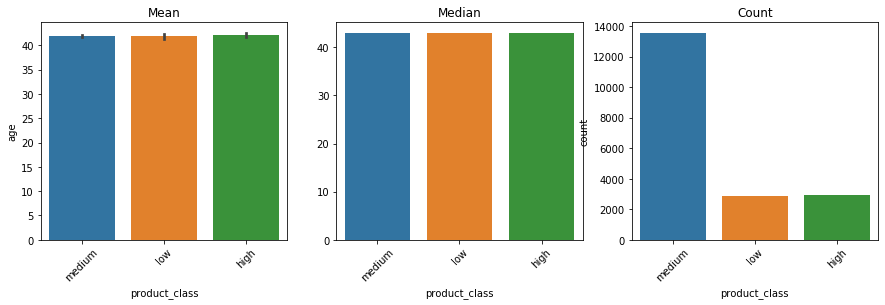

age vs product_size


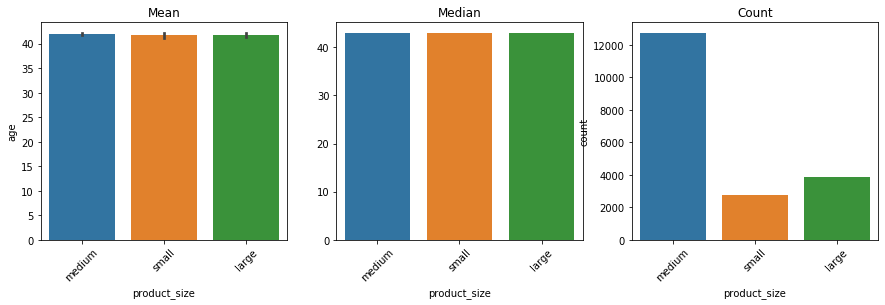

In [38]:
for num in num_indp_var:
    for cat in target_cat:
        indepNum_targetCat(num, cat, df)

# Let's divide age, tenure and property_valuation into buckets

In [39]:
age_buckets = [0,18,25,35,45,55,65,1000]
age_labels = ['0-18','18-25','25-35','35-45','45-55','55-65','>65']

tenure_buckets = [0,5,10,15,20,1000]
tenure_labels = ['0-5','5-10','10-15','15-20','>20']

property_valuation_buckets = [0,4,6,8,10,1000]
property_valuation_labels = ['0-4','4-6','6-8','8-10','>10']

df['age_buckets_labels'] = pd.cut(df['age'], bins=age_buckets, labels=age_labels, include_lowest=True)
df['age_buckets'] = pd.cut(df['age'], bins=age_buckets, include_lowest=True)

df['tenure_buckets_labels'] = pd.cut(df['tenure'], bins=tenure_buckets, labels=tenure_labels, include_lowest=True)
df['tenure_buckets'] = pd.cut(df['tenure'], bins=tenure_buckets, include_lowest=True)

df['property_valuation_buckets_labels'] = pd.cut(df['property_valuation'], bins=property_valuation_buckets,
                                                 labels=property_valuation_labels, include_lowest=True)
df['property_valuation_buckets'] = pd.cut(df['property_valuation'], bins=property_valuation_buckets, include_lowest=True)

df.head(5)

customer_id first_name  last_name gender  \
0            1    Laraine  Medendorp      F   
1            1    Laraine  Medendorp      F   
2            1    Laraine  Medendorp      F   
3            1    Laraine  Medendorp      F   
4            1    Laraine  Medendorp      F   

   past_3_years_bike_related_purchases        DOB            job_title  \
0                                   93 1953-10-12  Executive Secretary   
1                                   93 1953-10-12  Executive Secretary   
2                                   93 1953-10-12  Executive Secretary   
3                                   93 1953-10-12  Executive Secretary   
4                                   93 1953-10-12  Executive Secretary   

  job_industry_category wealth_segment deceased_indicator owns_car  tenure  \
0                Health  Mass Customer                  N      Yes    11.0   
1                Health  Mass Customer                  N      Yes    11.0   
2                Health  Mass Customer                  N      Yes    11.0   
3                Health  Mass Customer                  N      Yes    11.0   
4                Health  Mass Customer                  N      Yes    11.0   

   transaction_id  product_id transaction_date  online_order order_status  \
0              94          86       2017-12-23           0.0     Approved   
1            3765          38       2017-04-06           1.0     Approved   
2            5157          47       2017-05-11           1.0     Approved   
3            9785          72       2017-01-05           0.0     Approved   
4           13424           2       2017-02-21           0.0     Approved   

            brand product_line product_class product_size  list_price  \
0      OHM Cycles     Standard        medium       medium      235.63   
1           Solex     Standard        medium       medium     1577.53   
2   Trek Bicycles         Road           low        small     1720.70   
3  Norco Bicycles     Standard        medium       medium      360.40   
4           Solex     Standard        medium       medium       71.49   

   standard_cost  product_first_sold_date             address  postcode  \
0         125.07                  38482.0  060 Morning Avenue      2016   
1         826.51                  39526.0  060 Morning Avenue      2016   
2        1531.42                  37823.0  060 Morning Avenue      2016   
3         270.30                  37873.0  060 Morning Avenue      2016   
4          53.62                  38573.0  060 Morning Avenue      2016   

             state    country  property_valuation  birth_year   age  year  \
0  New South Wales  Australia                  10      1953.0  67.0  2017   
1  New South Wales  Australia                  10      1953.0  67.0  2017   
2  New South Wales  Australia                  10      1953.0  67.0  2017   
3  New South Wales  Australia                  10      1953.0  67.0  2017   
4  New South Wales  Australia                  10      1953.0  67.0  2017   

   month  weekday age_buckets_labels     age_buckets tenure_buckets_labels  \
0     12        5                >65  (65.0, 1000.0]                 10-15   
1      4        3                >65  (65.0, 1000.0]                 10-15   
2      5        3                >65  (65.0, 1000.0]                 10-15   
3      1        3                >65  (65.0, 1000.0]                 10-15   
4      2        1                >65  (65.0, 1000.0]                 10-15   

  tenure_buckets property_valuation_buckets_labels property_valuation_buckets  
0   (10.0, 15.0]                              8-10                (8.0, 10.0]  
1   (10.0, 15.0]                              8-10                (8.0, 10.0]  
2   (10.0, 15.0]                              8-10                (8.0, 10.0]  
3   (10.0, 15.0]                              8-10                (8.0, 10.0]  
4   (10.0, 15.0]                              8-10                (8.0, 10.0]

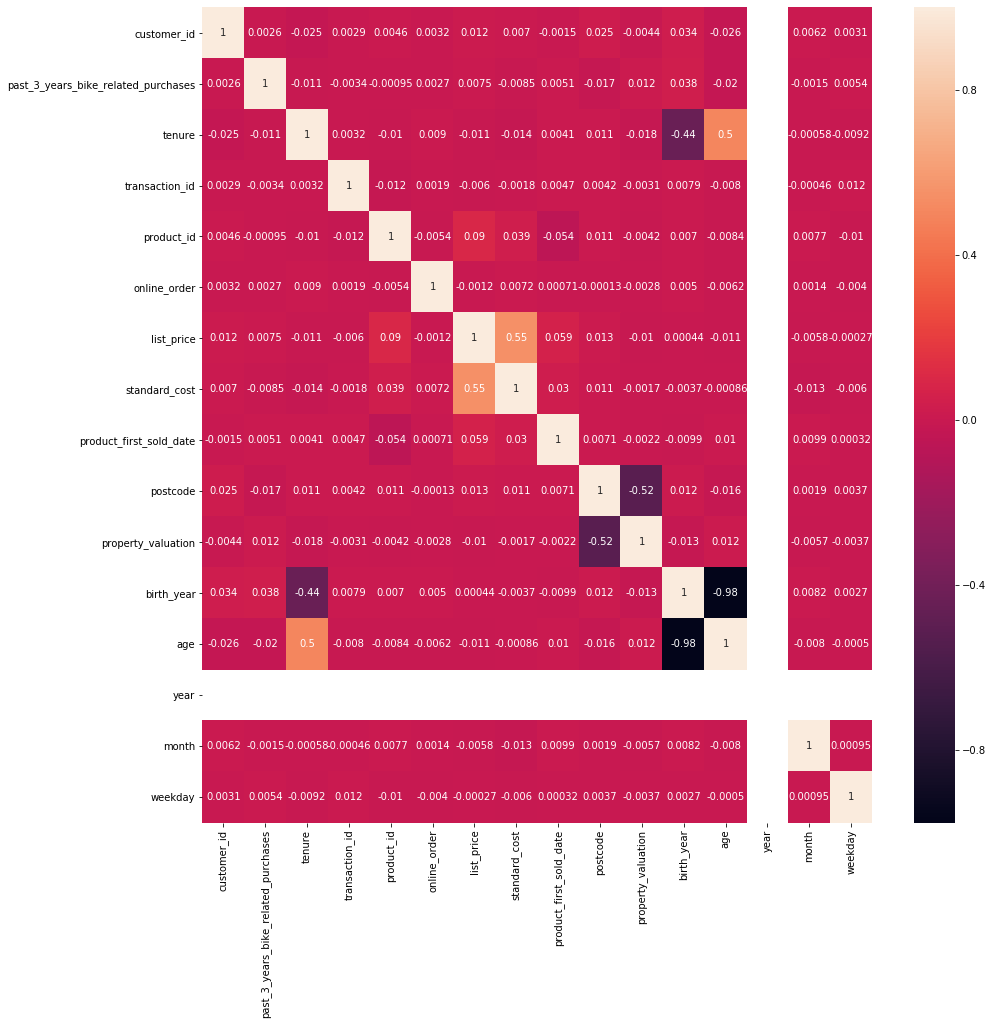

In [40]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

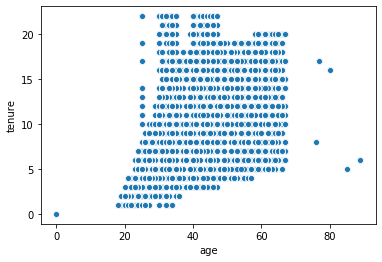

In [41]:
sns.scatterplot(df.age, df.tenure)

In [42]:
target_cat

['order_status', 'brand', 'product_line', 'product_class', 'product_size']

In [43]:
def table_analys(df, new_var, target_cat):
    for var in target_cat:
        plt.figure(figsize = (12,6))
        sns.heatmap(pd.pivot_table(df, index=new_var, columns=var, aggfunc='count', values='customer_id'),
                    annot=True, fmt='.5g')
        plt.yticks(rotation = 0)
        plt.show()

### Age Buckets

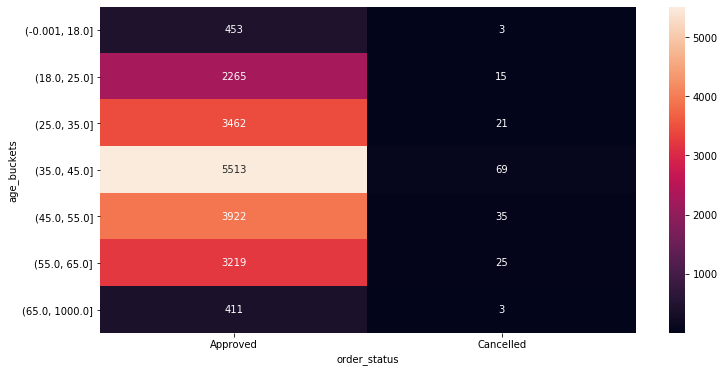

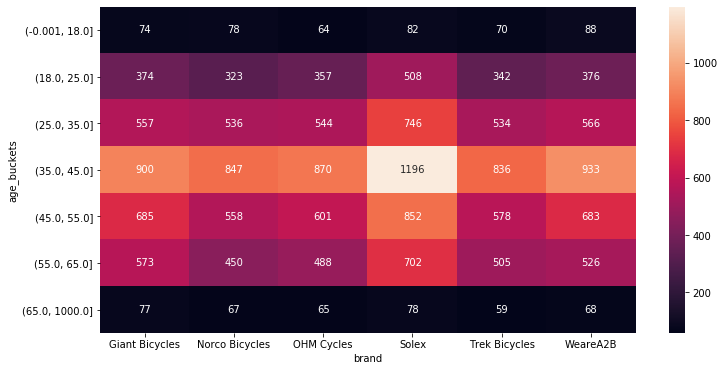

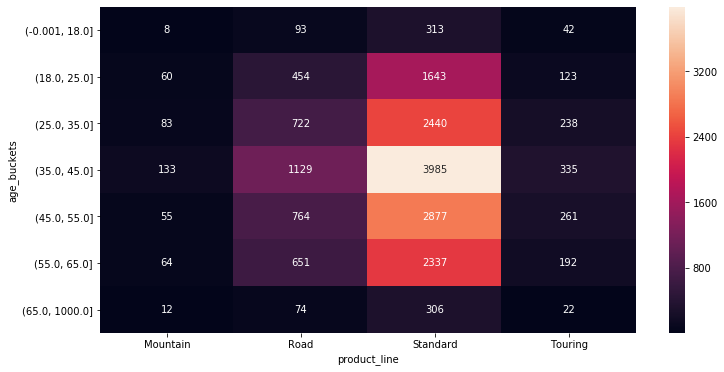

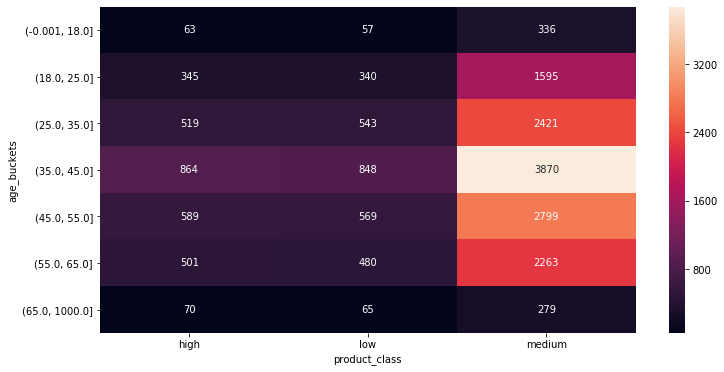

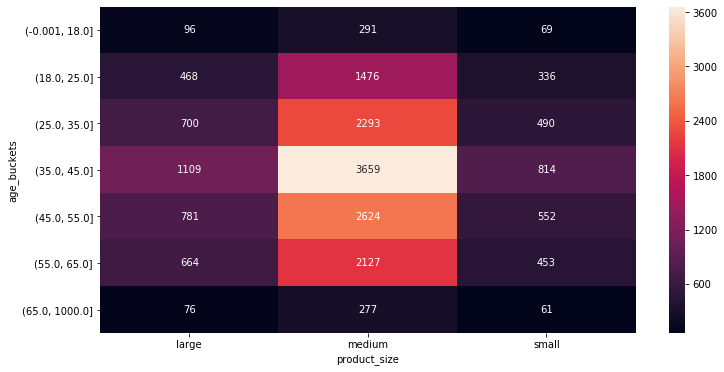

In [44]:
table_analys(df, 'age_buckets', target_cat)

### Tenure Buckets

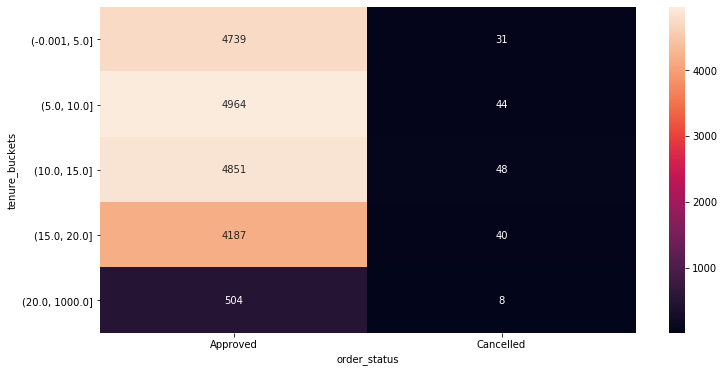

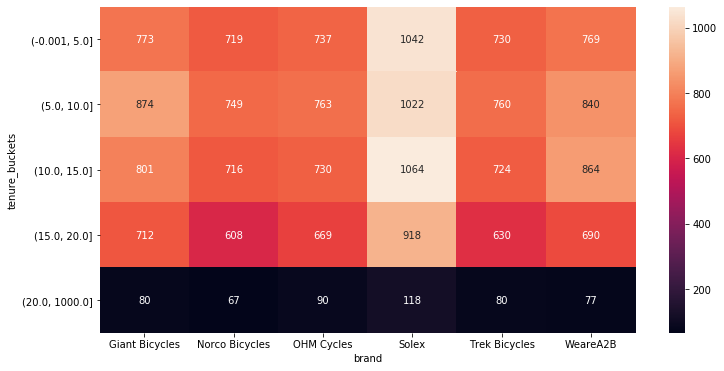

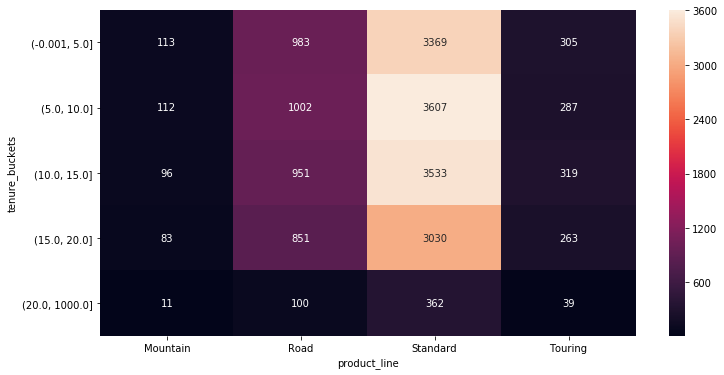

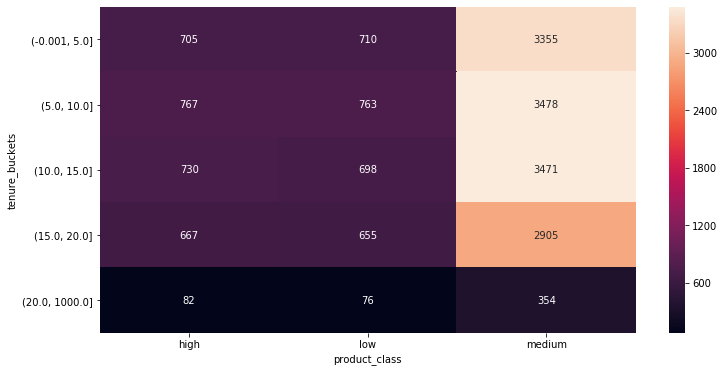

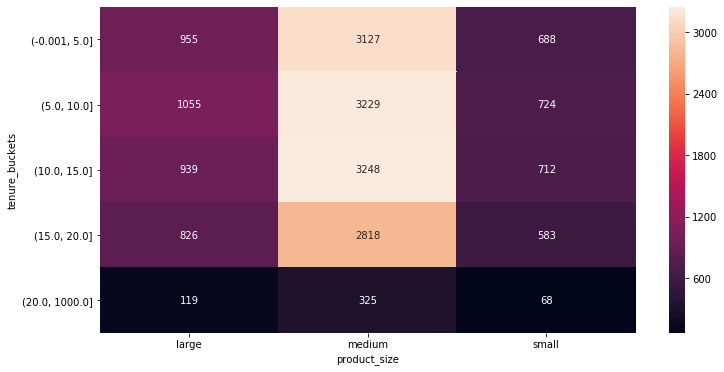

In [45]:
table_analys(df, 'tenure_buckets', target_cat)

### Property valuation buckets

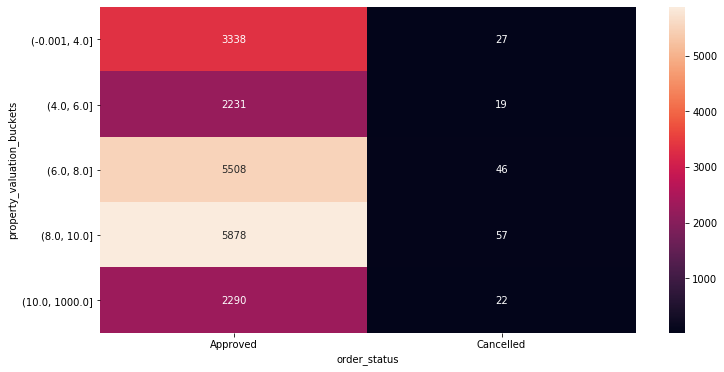

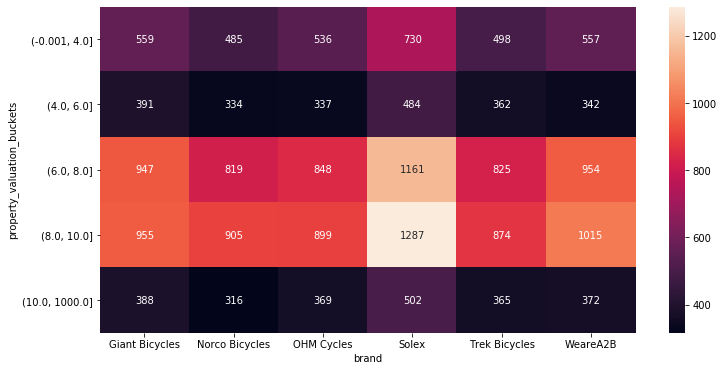

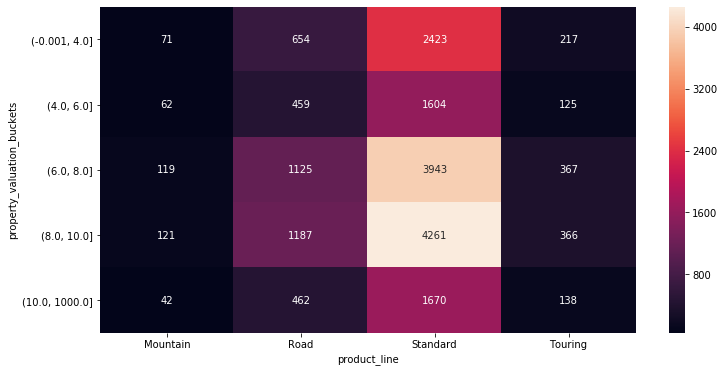

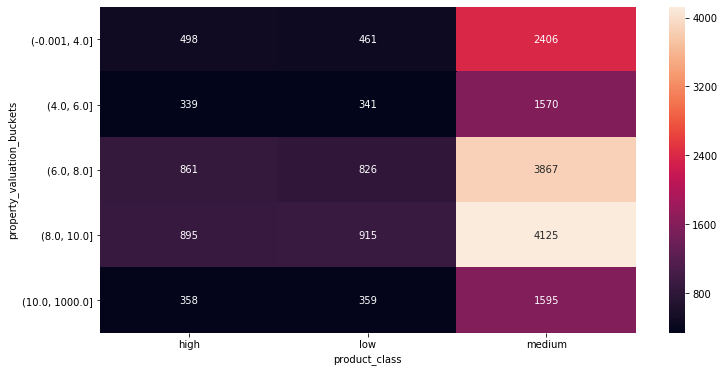

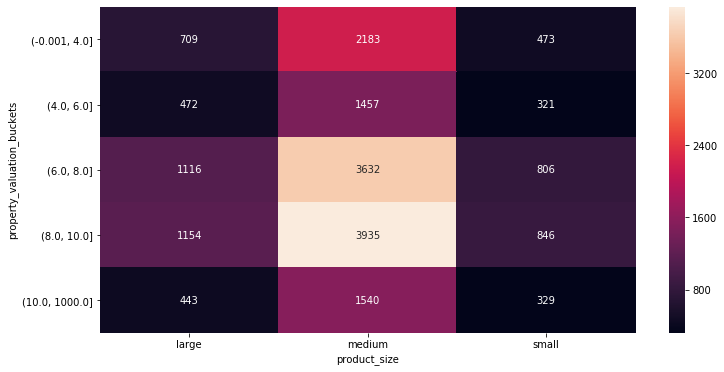

In [46]:
table_analys(df, 'property_valuation_buckets', target_cat)

### Independent numeric variables vs target numeric variables

past_3_years_bike_related_purchases vs online_order


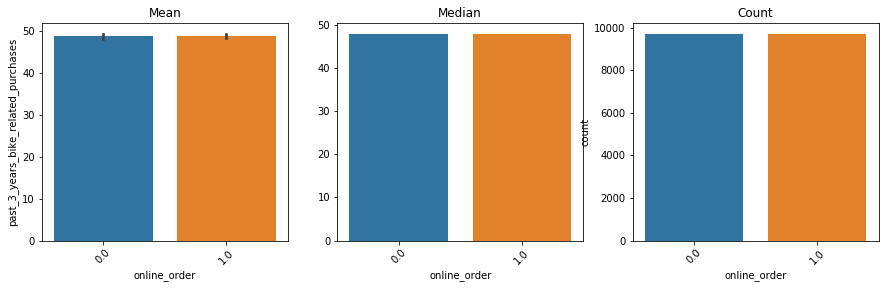

past_3_years_bike_related_purchases vs month


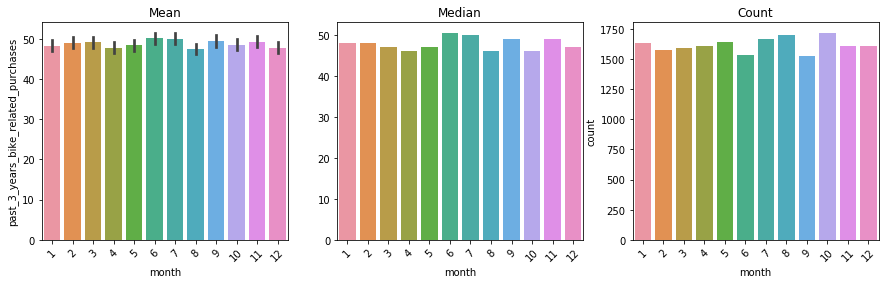

past_3_years_bike_related_purchases vs weekday


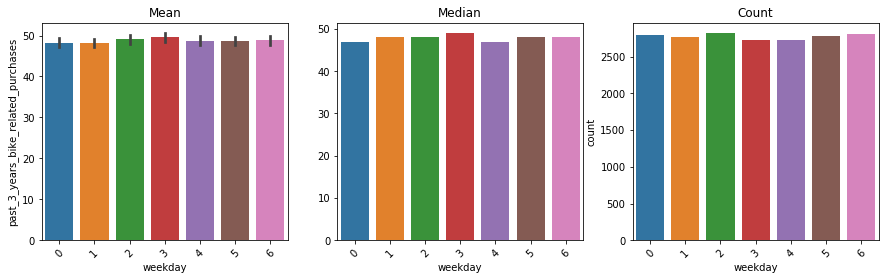

tenure vs online_order


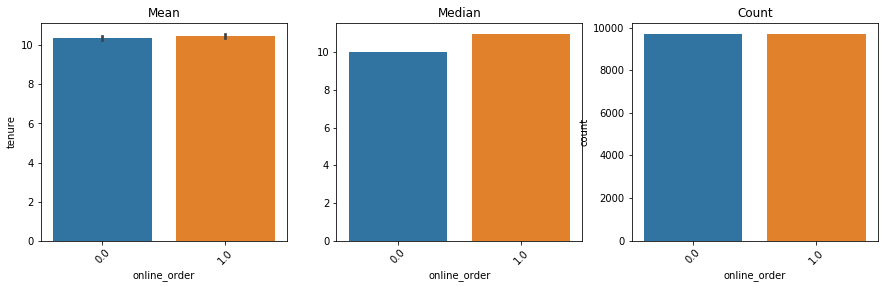

tenure vs month


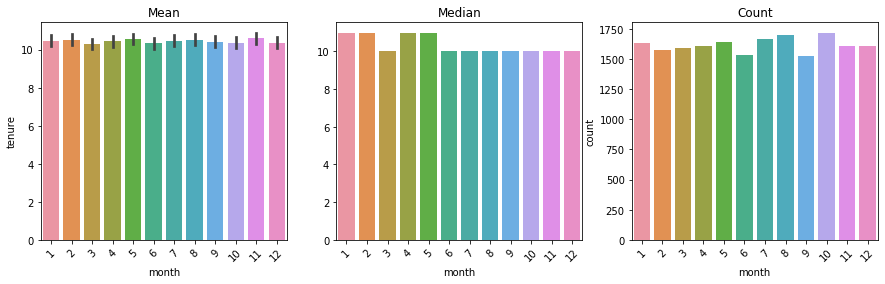

tenure vs weekday


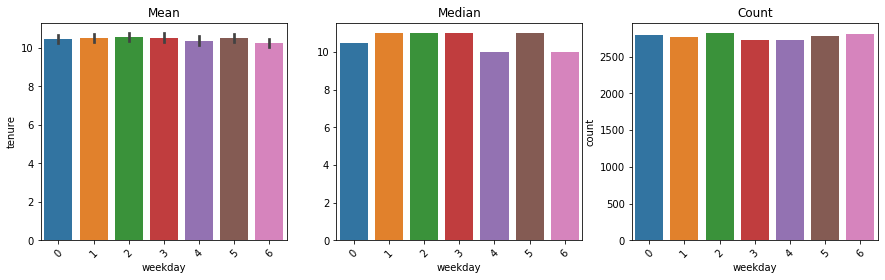

postcode vs online_order


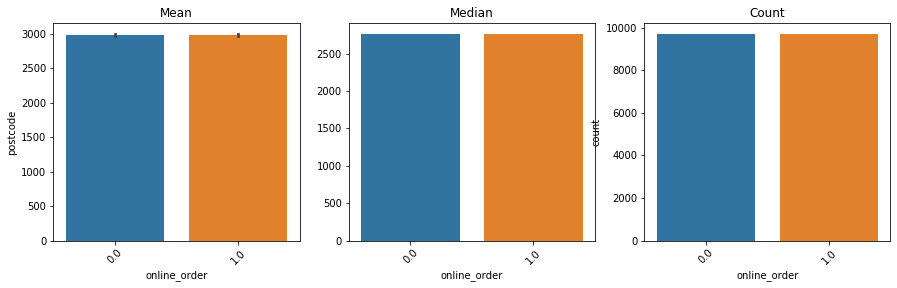

postcode vs month


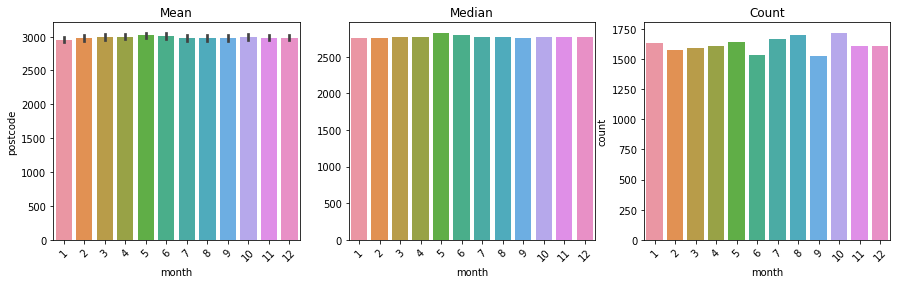

postcode vs weekday


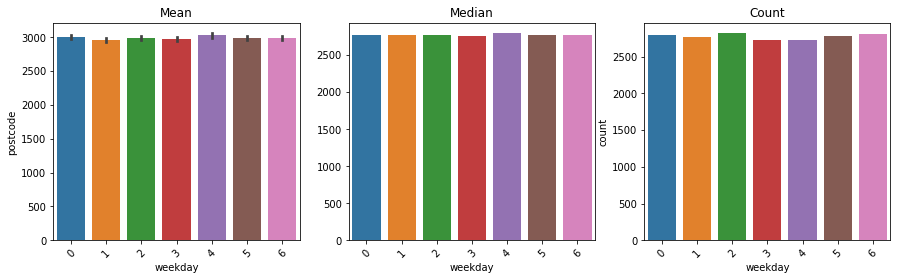

property_valuation vs online_order


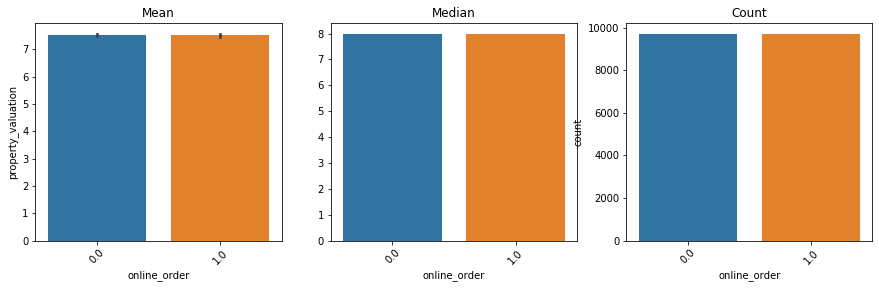

property_valuation vs month


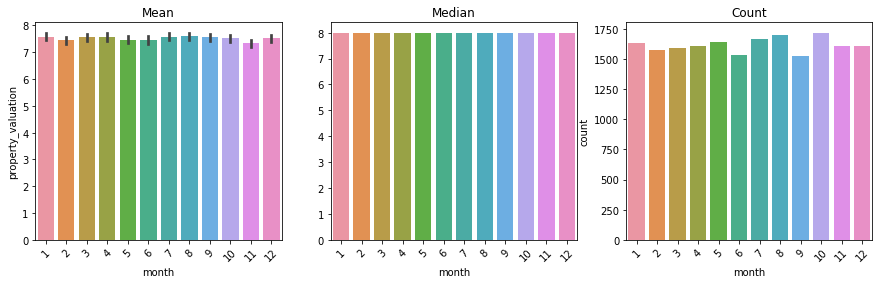

property_valuation vs weekday


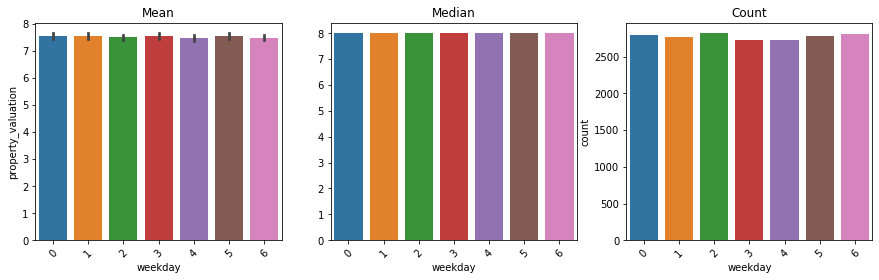

age vs online_order


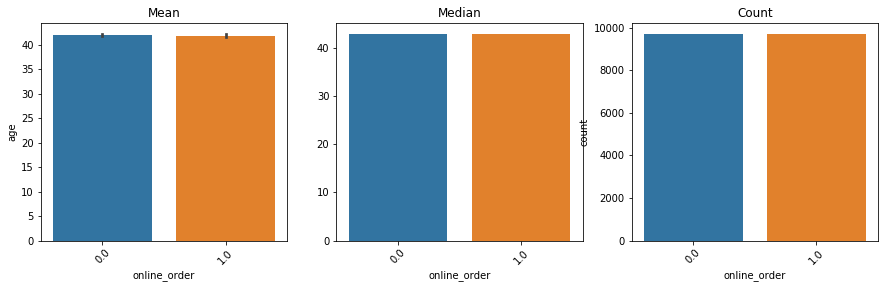

age vs month


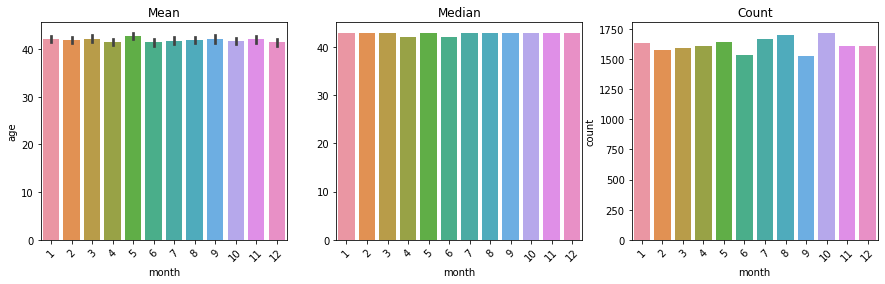

age vs weekday


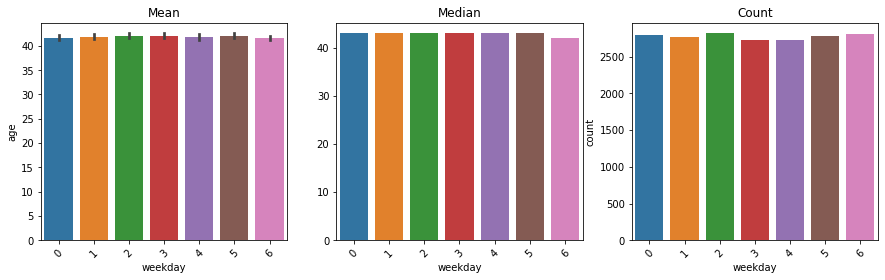

In [47]:
for num in num_indp_var:
    for t_num in ['online_order', 'month', 'weekday']:
        indepNum_targetCat(num, t_num, df)

### Age buckets vs target_num

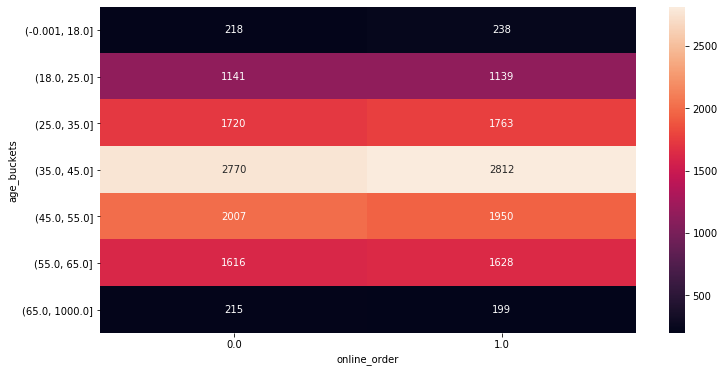

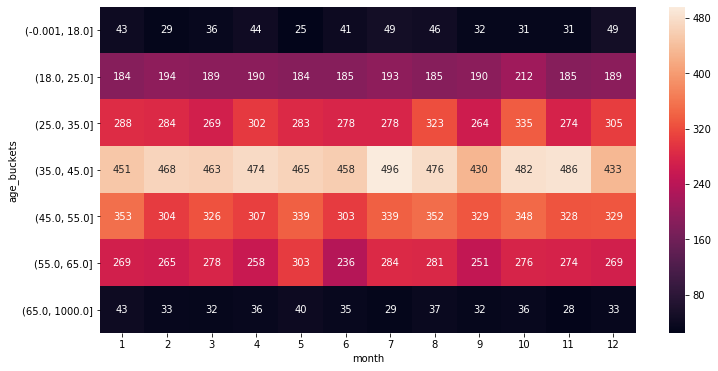

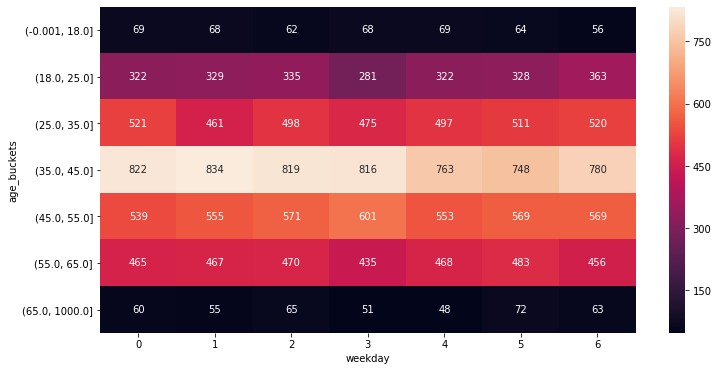

In [48]:
table_analys(df, 'age_buckets', ['online_order', 'month', 'weekday'])

### Tenure buckets vs target_num

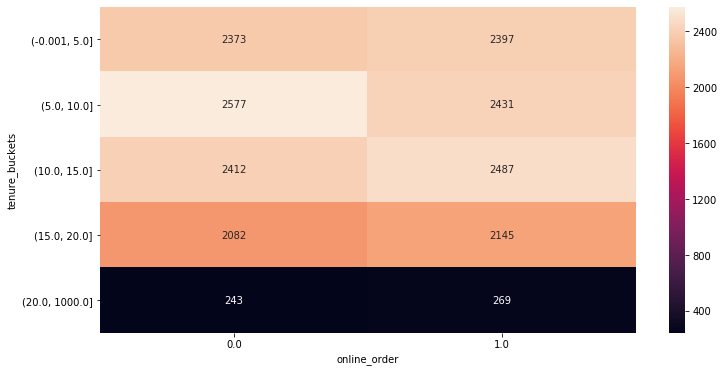

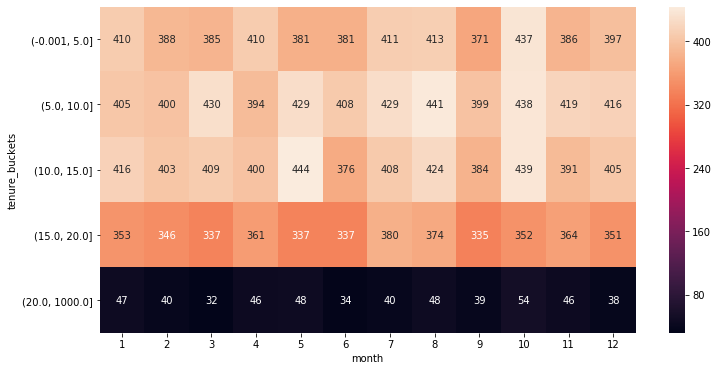

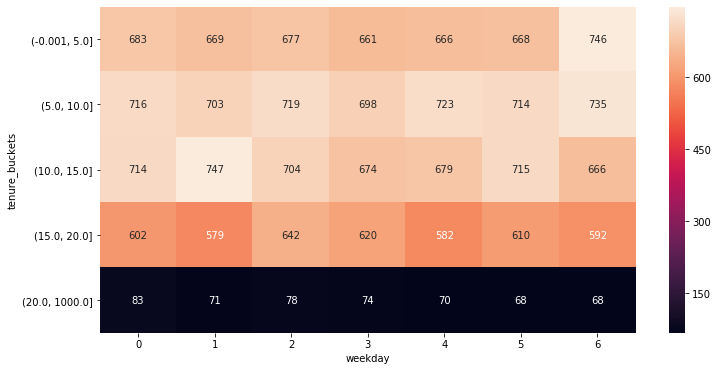

In [49]:
table_analys(df, 'tenure_buckets', ['online_order', 'month', 'weekday'])

### Property Valuation buckets vs target_num

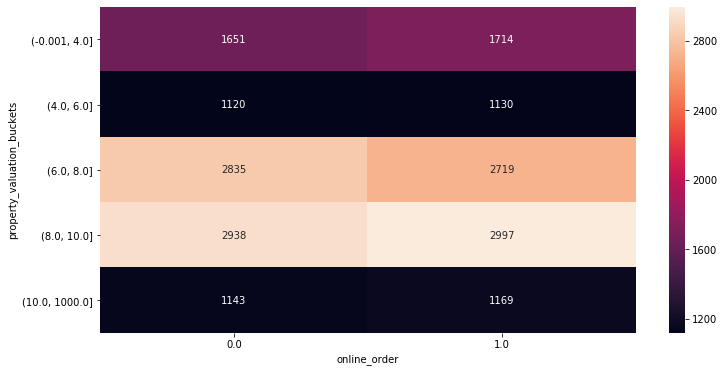

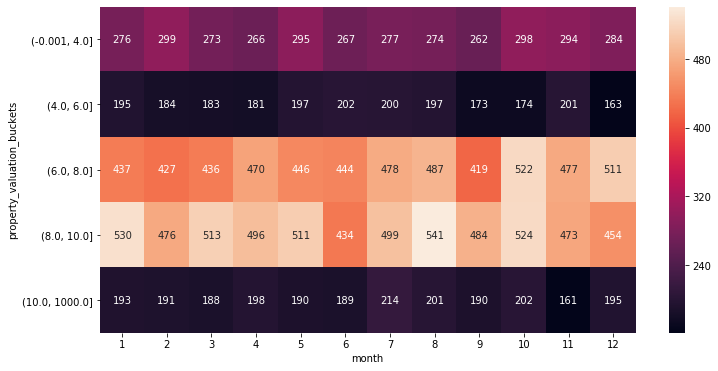

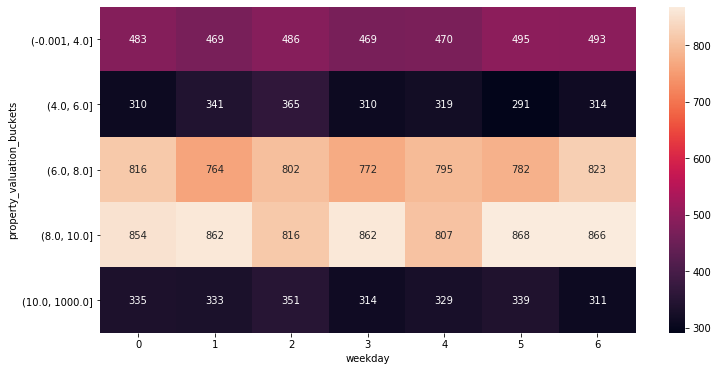

In [50]:
table_analys(df, 'property_valuation_buckets', ['online_order', 'month', 'weekday'])

# Independent categorical variables

In [51]:
cat_indp_var = [var for var in independent_attribute if df[var].dtypes == 'object']
cat_indp_var

['first_name',
 'last_name',
 'gender',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'deceased_indicator',
 'owns_car',
 'address',
 'state',
 'country']

In [52]:
for var in cat_indp_var:
    print(var,'->',df[var].nunique(),'\n')

first_name -> 2834 

last_name -> 3261 

gender -> 6 

job_title -> 196 

job_industry_category -> 10 

wealth_segment -> 3 

deceased_indicator -> 2 

owns_car -> 2 

address -> 3485 

state -> 5 

country -> 1 



- country has only one label, all the customers belong to same country
- gender has 6 labels, so need to fix it

In [53]:
cat_indp_var = cat_indp_var[2:-1]
cat_indp_var

['gender',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'deceased_indicator',
 'owns_car',
 'address',
 'state']

In [54]:
# unique labels of gender columns 
df.gender.unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [55]:
#Fixing gender labels
def gender_labels(label):
    if label == 'M':
        return 'Male'
    elif label == 'F' or label == 'Femal':
        return 'Female'
    else:
        return label
    
df['gender'] = df['gender'].apply(gender_labels)
df['gender'].unique()

array(['Female', 'Male', 'U'], dtype=object)

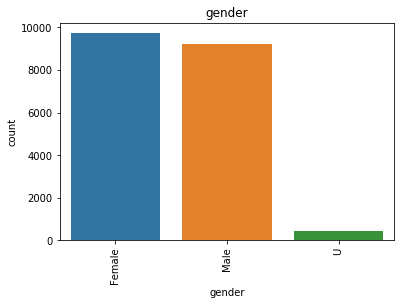

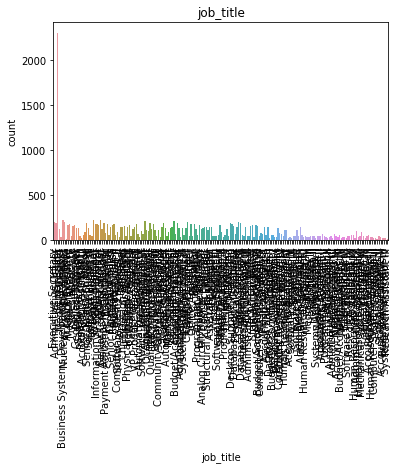

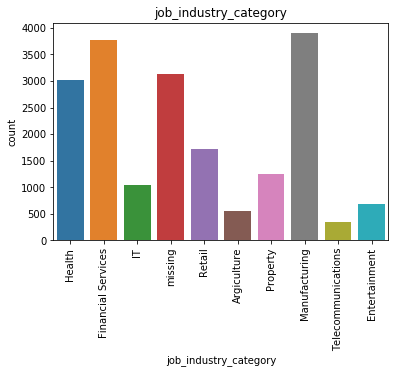

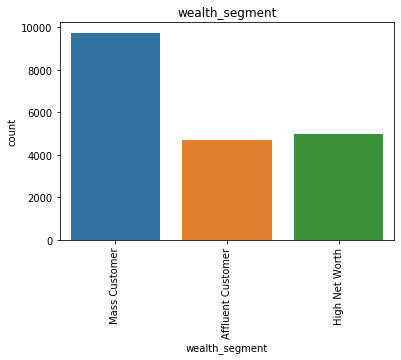

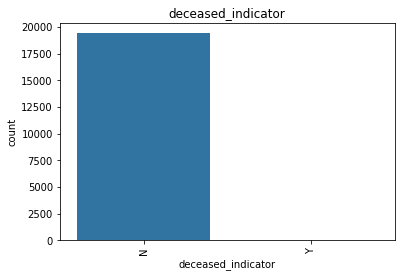

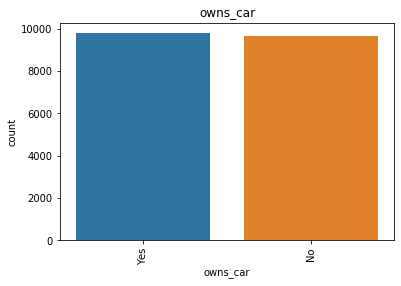

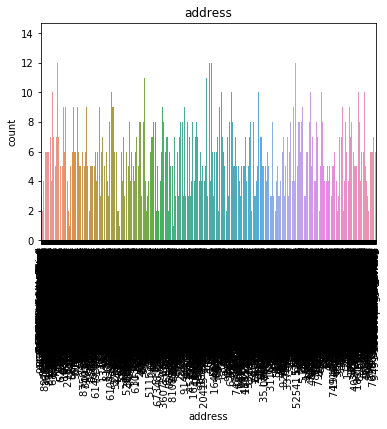

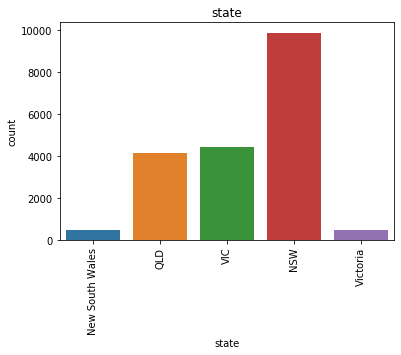

In [56]:
for var in cat_indp_var:
    sns.countplot(df[var])
    plt.title(var)
    plt.xticks(rotation=90)
    plt.show()

In [57]:
#Fixing state labels
def state_labels(label):
    if label == 'New South Wales':
        return 'NSW'
    elif label == 'Victoria':
        return 'VIC'
    else:
        return label
    
df['state'] = df['state'].apply(state_labels)
df['state'].unique()

array(['NSW', 'QLD', 'VIC'], dtype=object)

In [58]:
# Percentage of each labels of categorical variables in dataset
for var in ['gender', 'job_industry_category', 'wealth_segment', 'deceased_indicator', 'owns_car', 'state']:
    print(var,'\n',df[var].value_counts()/df.shape[0]*100,'\n')

gender 
 Female    50.144211
Male      47.599918
U          2.255871
Name: gender, dtype: float64 

job_industry_category 
 Manufacturing         20.071075
Financial Services    19.406675
missing               16.115575
Health                15.533581
Retail                 8.848372
Property               6.443140
IT                     5.361557
Entertainment          3.533169
Argiculture            2.879069
Telecommunications     1.807787
Name: job_industry_category, dtype: float64 

wealth_segment 
 Mass Customer        50.190564
High Net Worth       25.520190
Affluent Customer    24.289246
Name: wealth_segment, dtype: float64 

deceased_indicator 
 N    99.958797
Y     0.041203
Name: deceased_indicator, dtype: float64 

owns_car 
 Yes    50.375979
No     49.624021
Name: owns_car, dtype: float64 

state 
 NSW    53.378657
VIC    25.278121
QLD    21.343222
Name: state, dtype: float64 



In [59]:
target_cat

['order_status', 'brand', 'product_line', 'product_class', 'product_size']

In [60]:
target_num

['online_order',
 'list_price',
 'standard_cost',
 'product_first_sold_date',
 'month',
 'weekday']

In [61]:
cat_indp_var

['gender',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'deceased_indicator',
 'owns_car',
 'address',
 'state']

In [62]:
variable = iter(cat_indp_var)

### Gender vs target categorical columns

In [63]:
next(variable)

'gender'

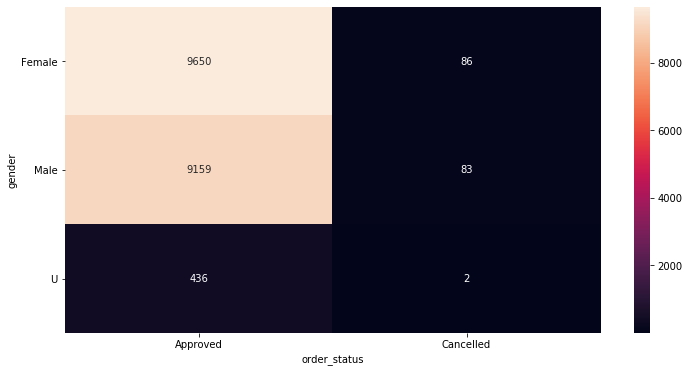

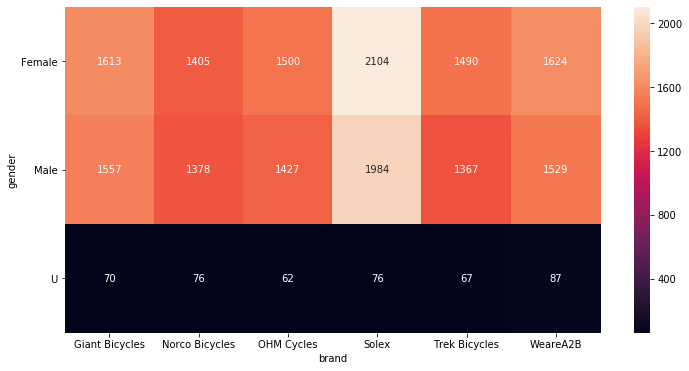

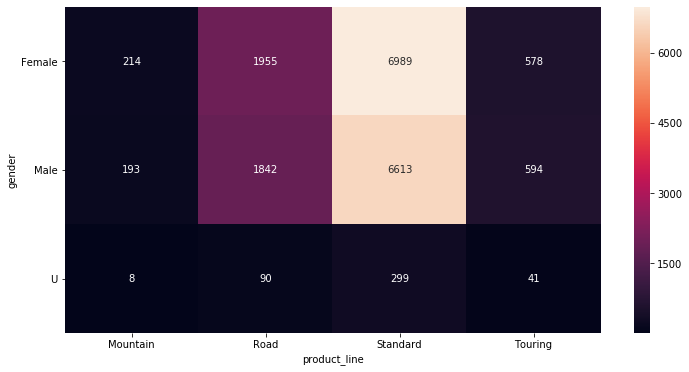

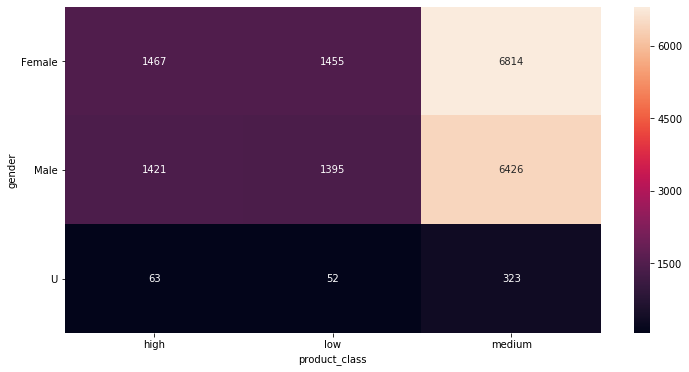

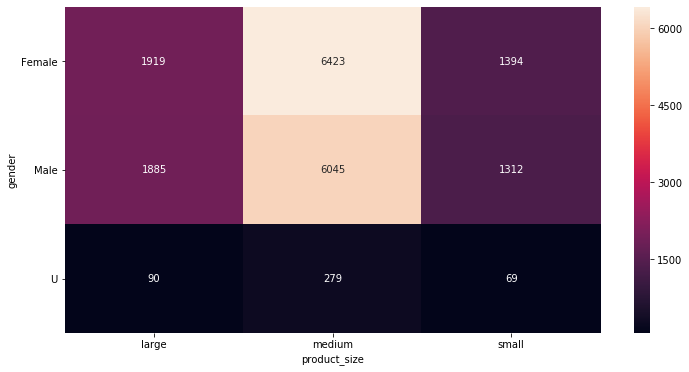

In [64]:
table_analys(df, 'gender', target_cat)

In [65]:
next(variable)

'job_title'

In [66]:
next(variable)

'job_industry_category'

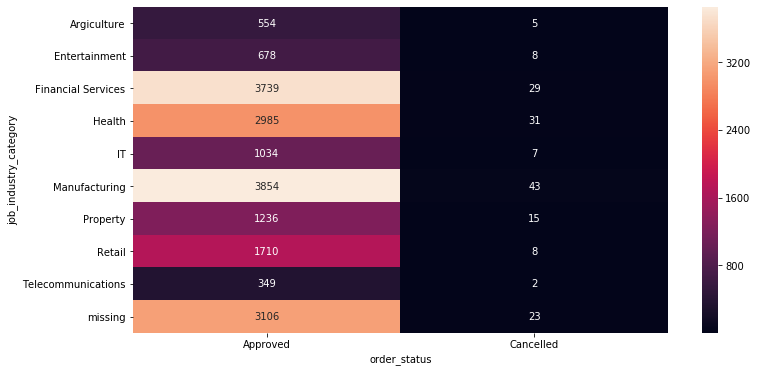

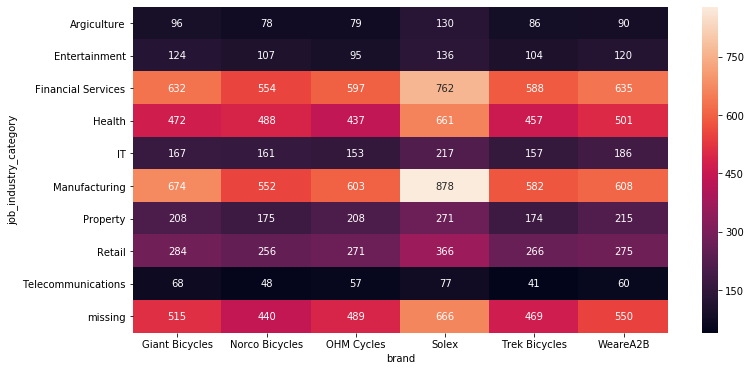

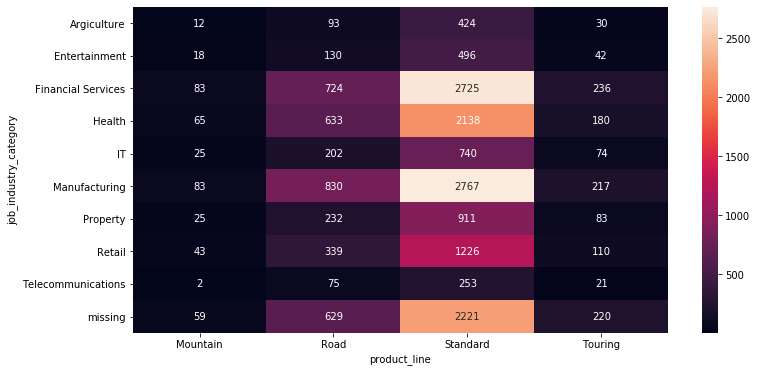

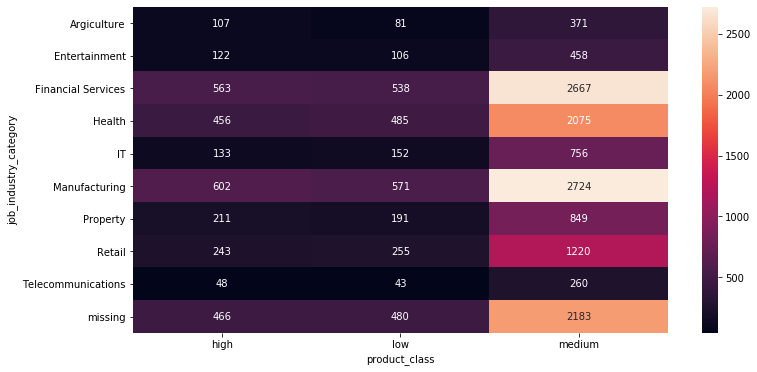

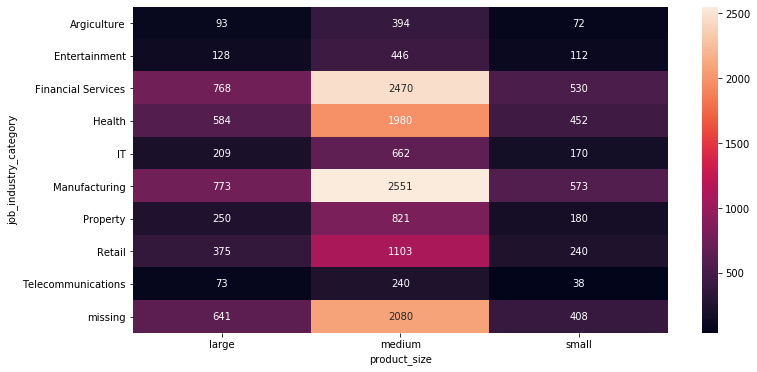

In [67]:
table_analys(df, 'job_industry_category', target_cat)

In [68]:
next(variable)

'wealth_segment'

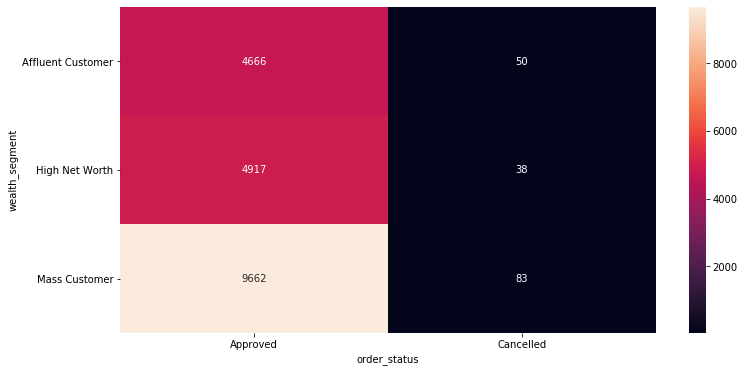

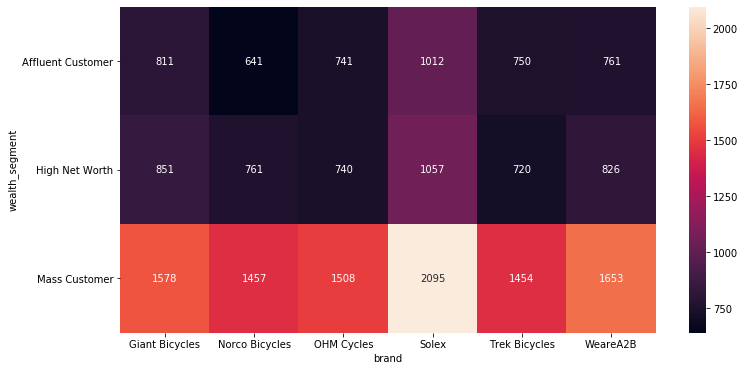

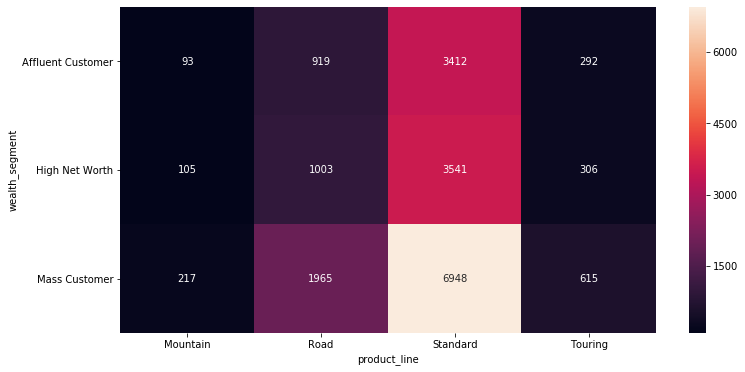

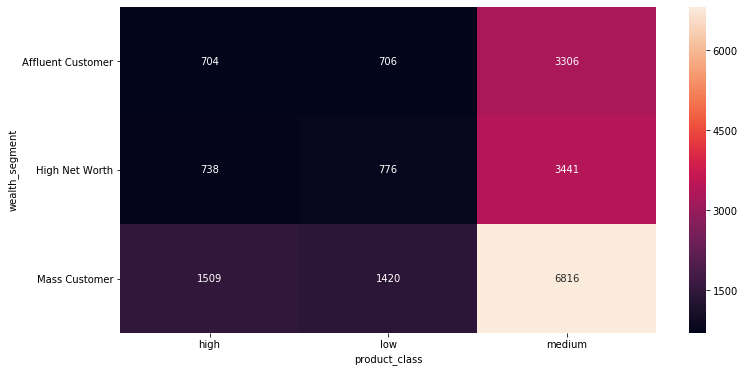

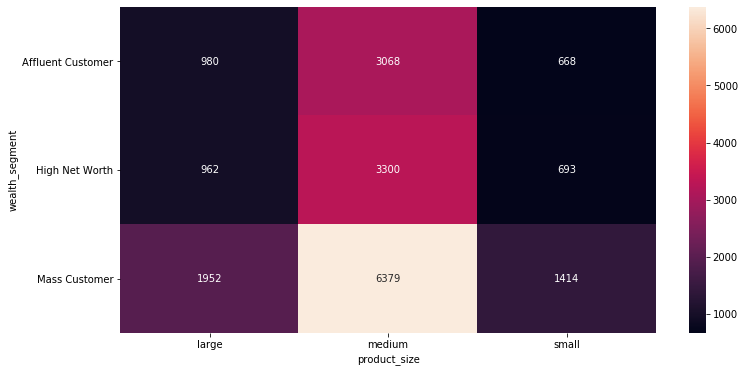

In [69]:
table_analys(df, 'wealth_segment', target_cat)

In [70]:
next(variable)

'deceased_indicator'

In [71]:
next(variable)

'owns_car'

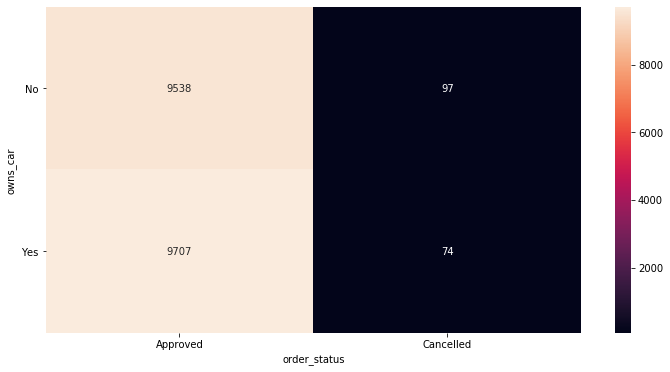

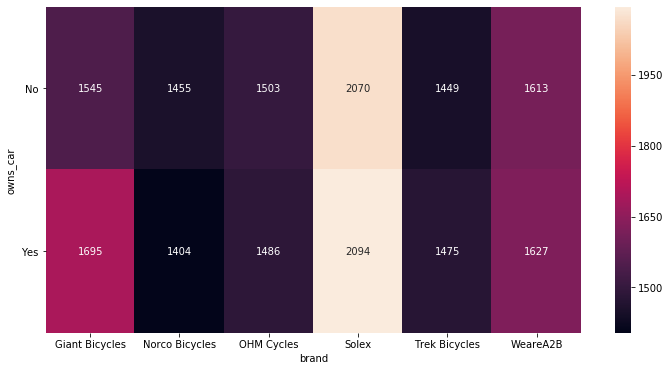

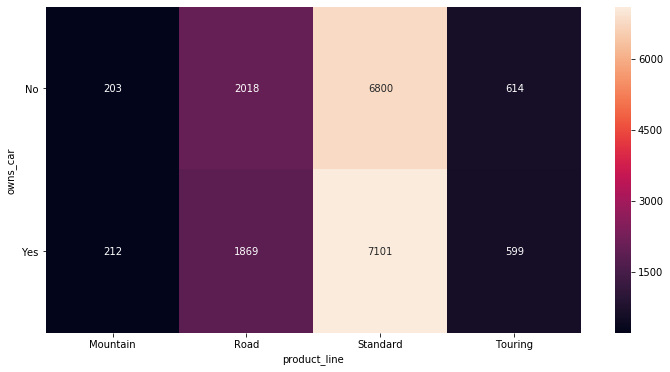

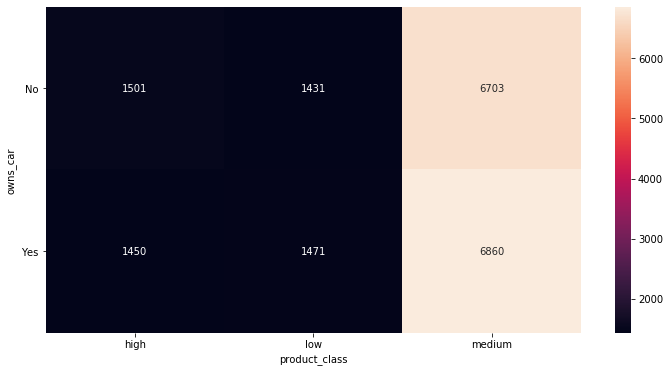

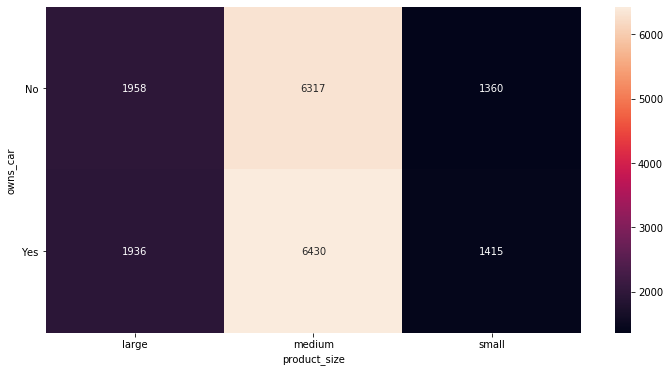

In [72]:
table_analys(df, 'owns_car', target_cat)

In [73]:
next(variable)

'address'

In [74]:
next(variable)

'state'

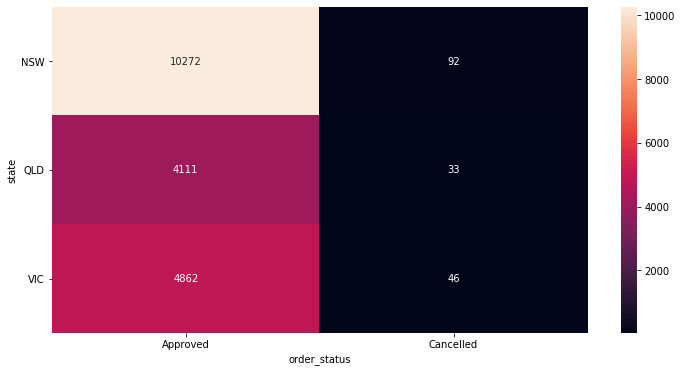

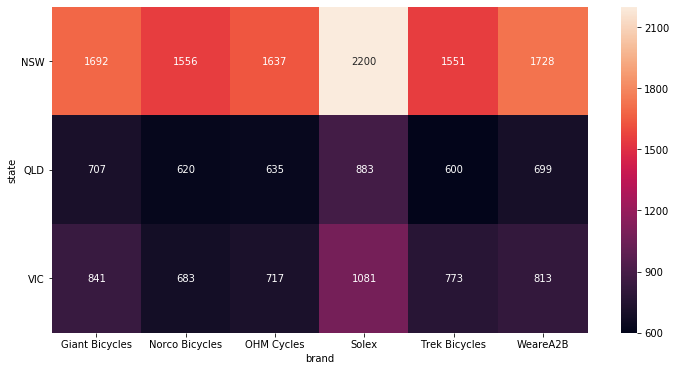

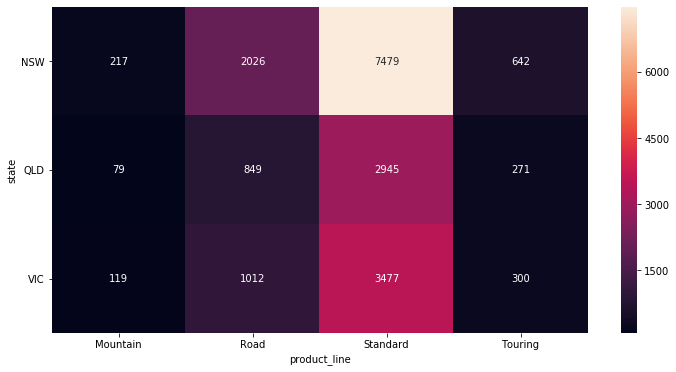

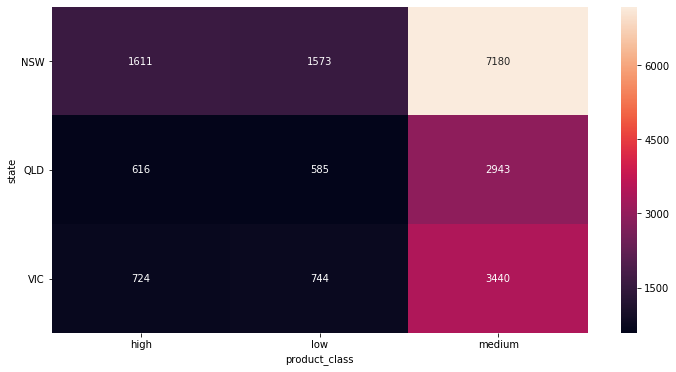

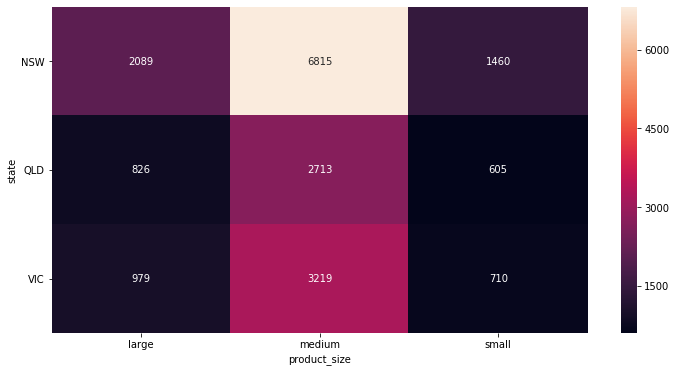

In [75]:
table_analys(df, 'state', target_cat)

We have analysed all the independent categorical variables

# WordCloud formation

In [76]:
from wordcloud import WordCloud, STOPWORDS

def word_cloud(column_name):
    comment_words = ' '
    for val in df[column_name]:
        val = str(val)
        tokens = val.split()
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        for words in tokens:
            comment_words = comment_words+words+' '
        
    wordcloud = WordCloud(width = 3000, height = 2000, background_color = 'black',
                          stopwords = STOPWORDS).generate(comment_words)
    fig = plt.figure(figsize = (40, 40))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

### Job Title

Job Titles


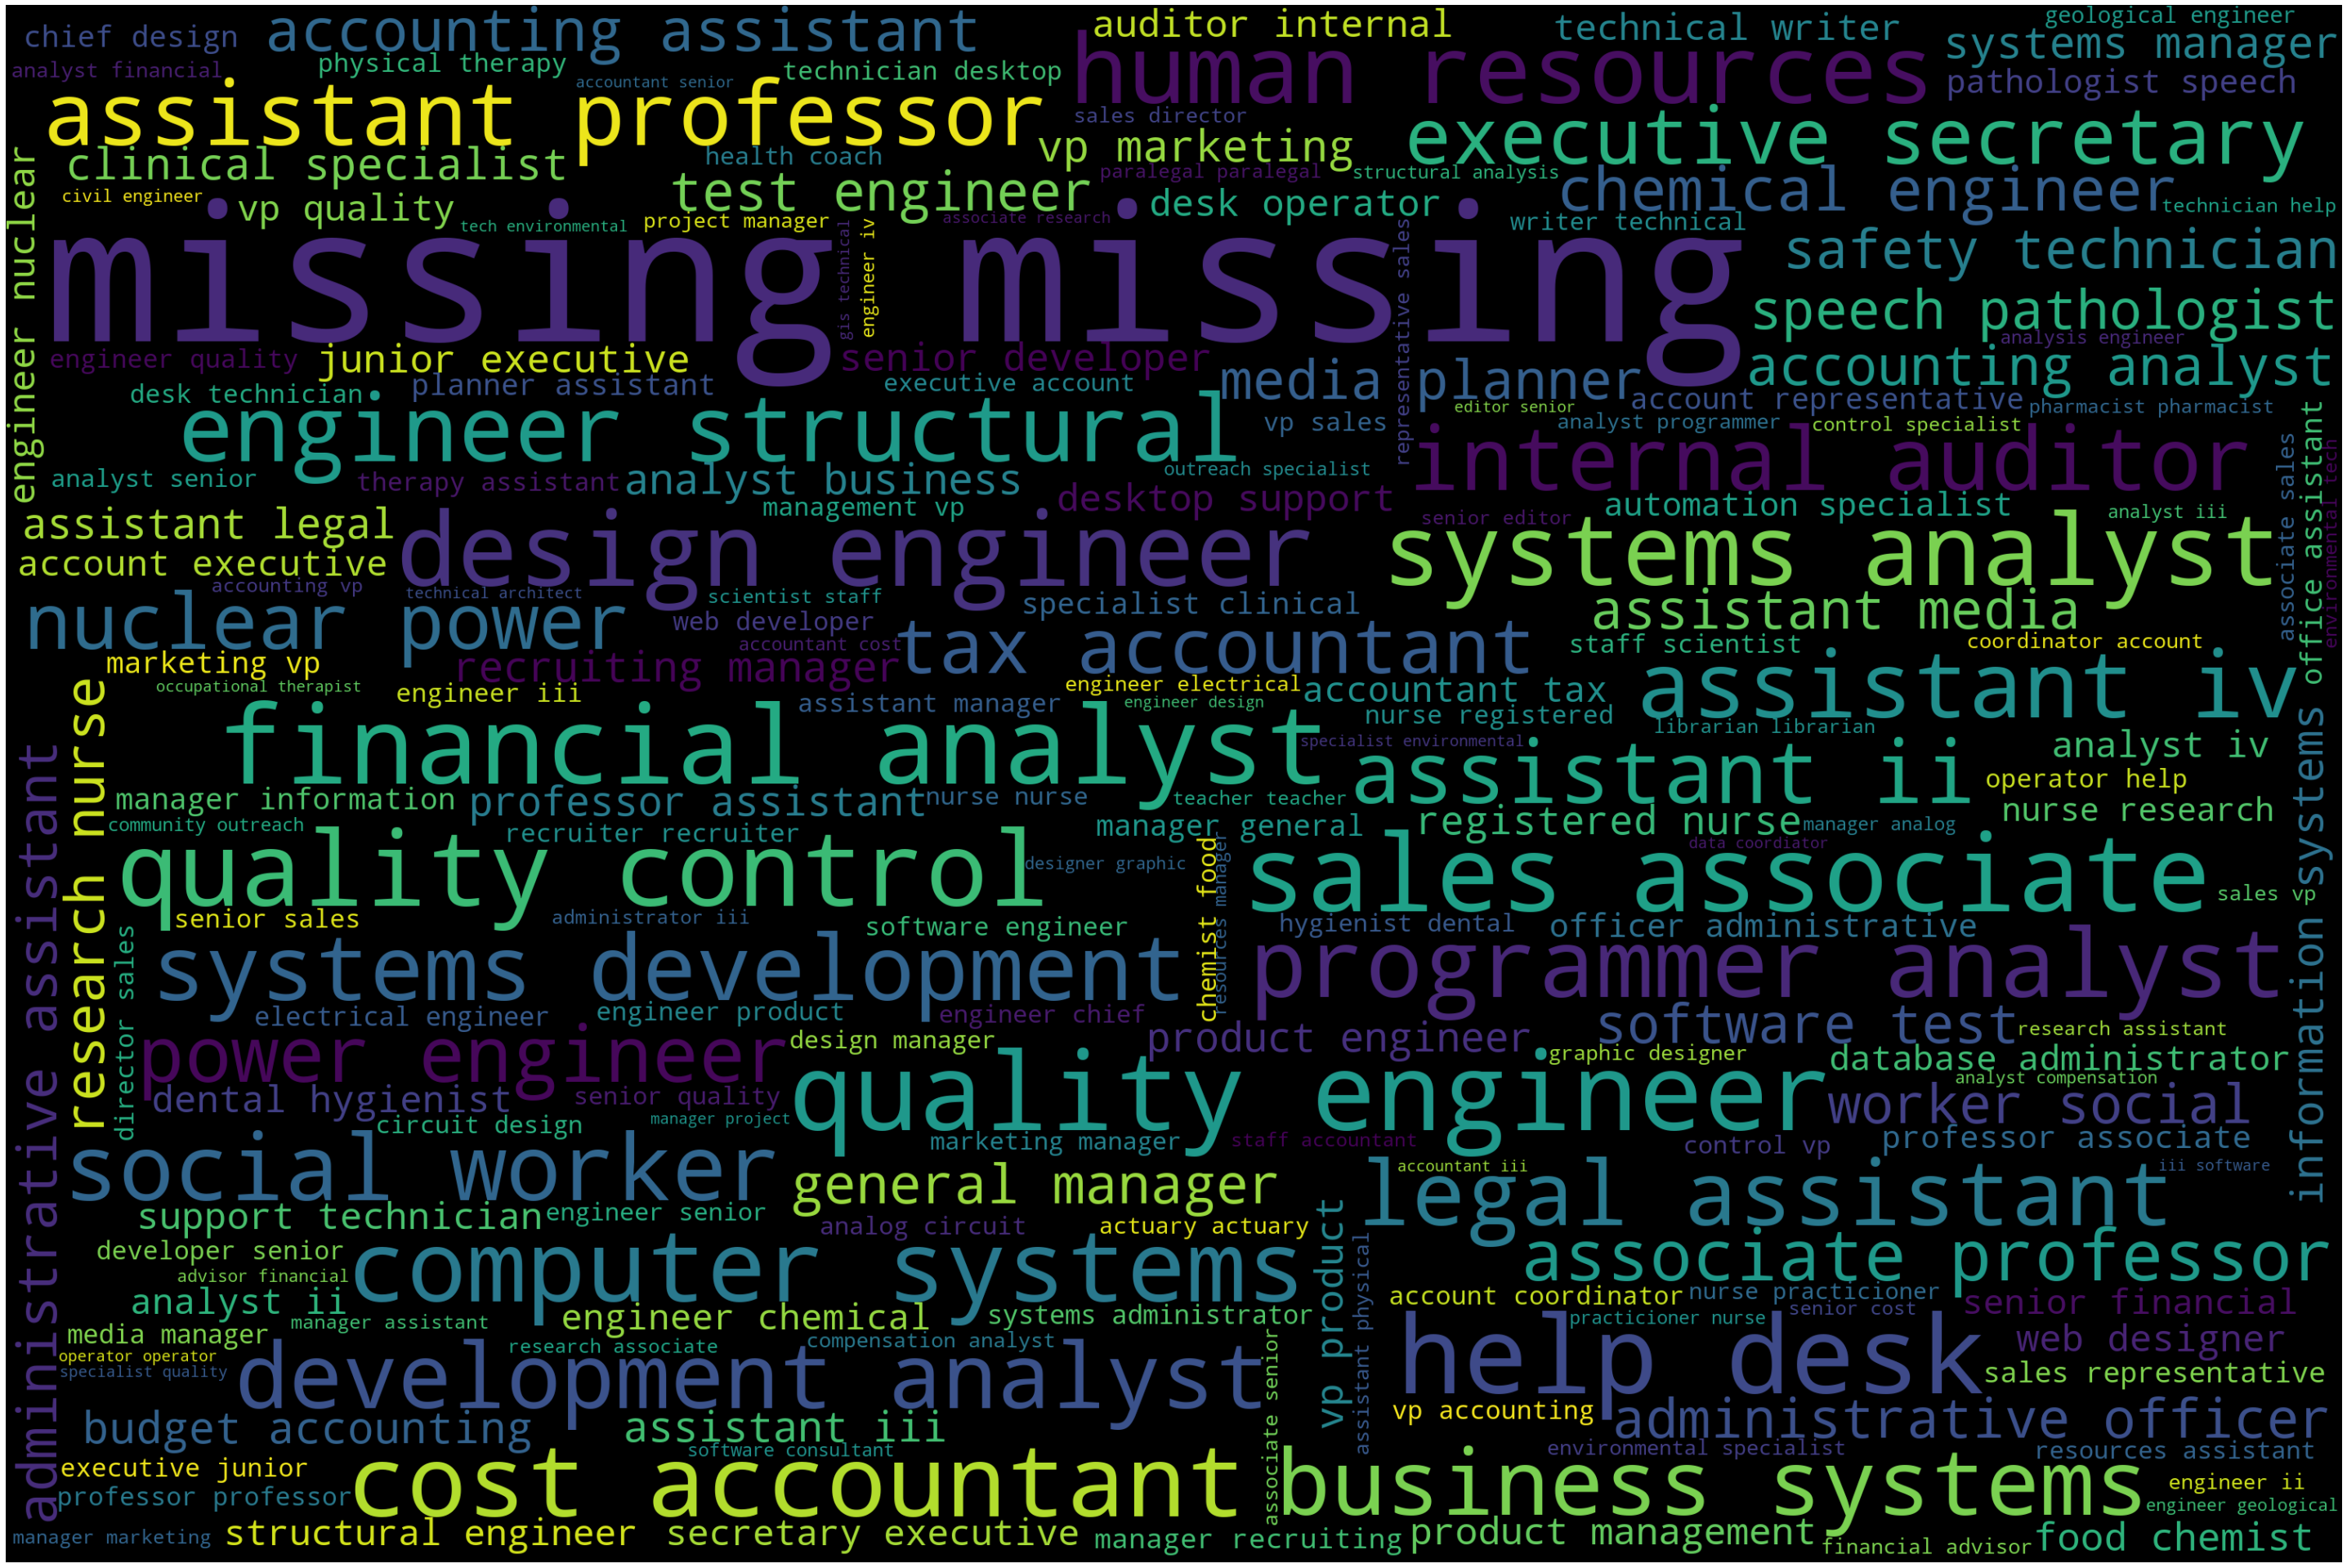

In [77]:
print('Job Titles')
word_cloud('job_title')

### Address

Address


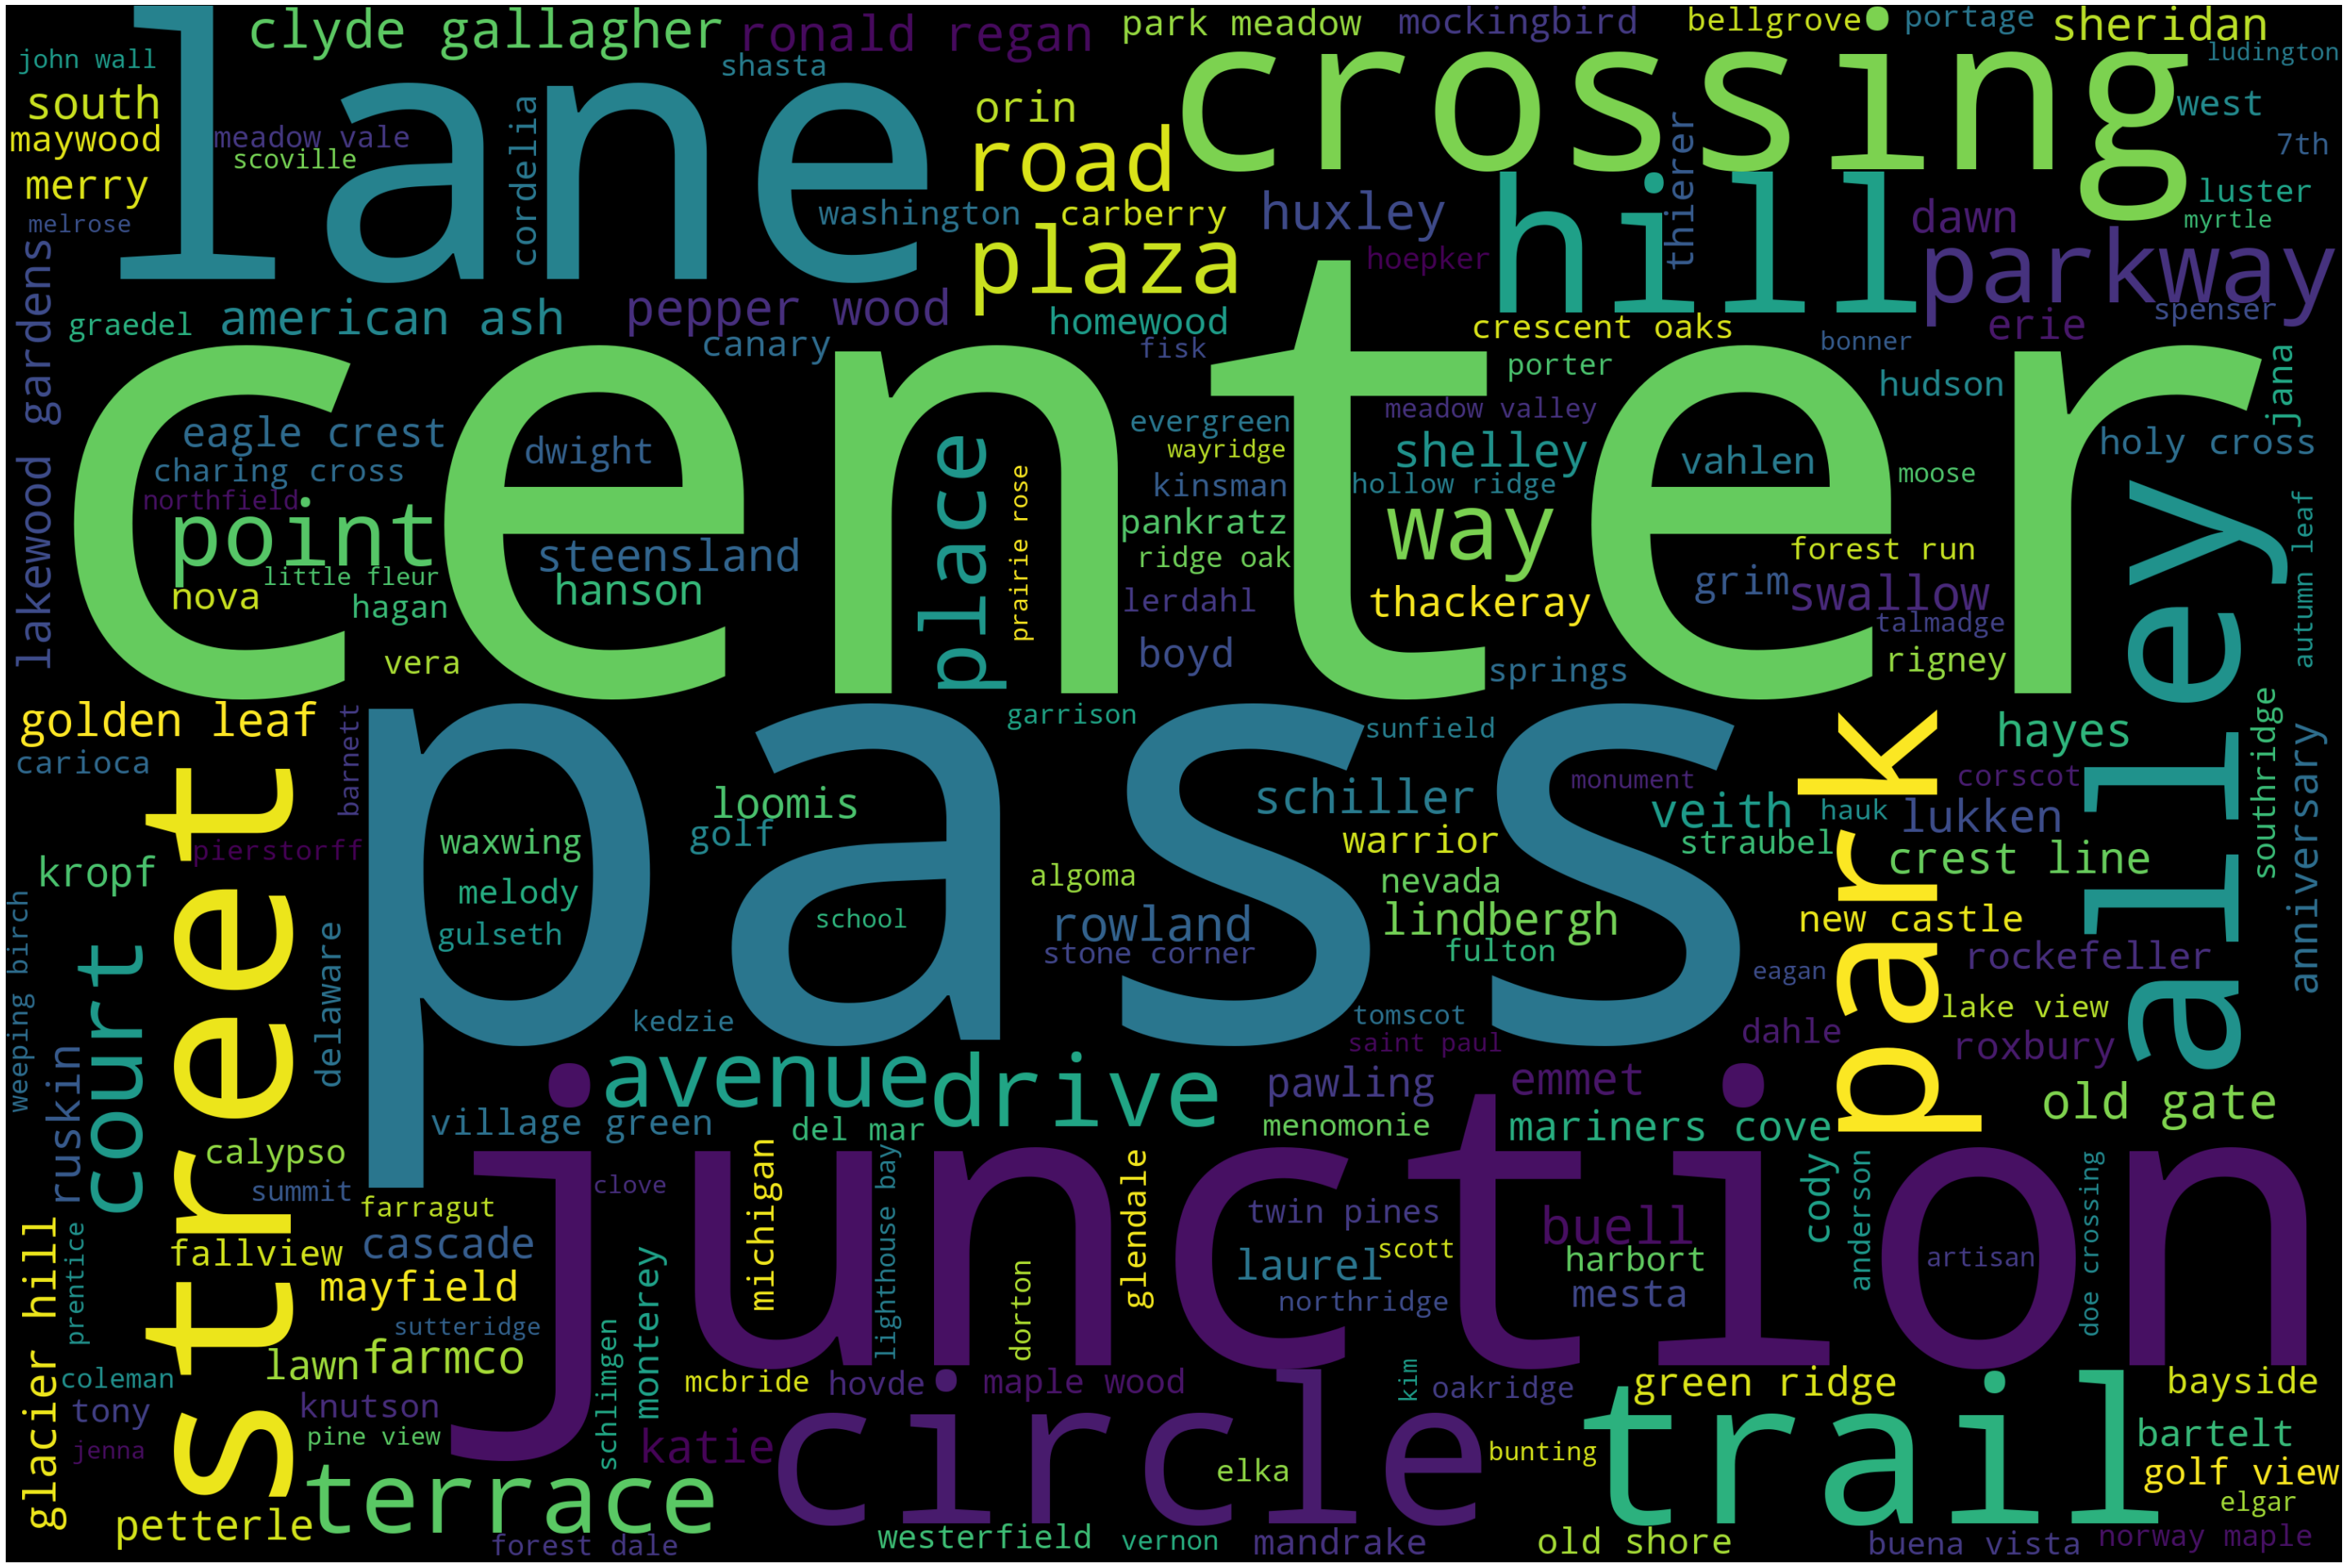

In [78]:
print('Address')
word_cloud('address')

# Feature selection

In [79]:
independent_attribute

['first_name',
 'last_name',
 'gender',
 'past_3_years_bike_related_purchases',
 'DOB',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'deceased_indicator',
 'owns_car',
 'tenure',
 'address',
 'postcode',
 'state',
 'country',
 'property_valuation',
 'age']

In [80]:
df.reset_index(inplace=True, drop=True)

In [81]:
df.head()

customer_id first_name  last_name  gender  \
0            1    Laraine  Medendorp  Female   
1            1    Laraine  Medendorp  Female   
2            1    Laraine  Medendorp  Female   
3            1    Laraine  Medendorp  Female   
4            1    Laraine  Medendorp  Female   

   past_3_years_bike_related_purchases        DOB            job_title  \
0                                   93 1953-10-12  Executive Secretary   
1                                   93 1953-10-12  Executive Secretary   
2                                   93 1953-10-12  Executive Secretary   
3                                   93 1953-10-12  Executive Secretary   
4                                   93 1953-10-12  Executive Secretary   

  job_industry_category wealth_segment deceased_indicator owns_car  tenure  \
0                Health  Mass Customer                  N      Yes    11.0   
1                Health  Mass Customer                  N      Yes    11.0   
2                Health  Mass Customer                  N      Yes    11.0   
3                Health  Mass Customer                  N      Yes    11.0   
4                Health  Mass Customer                  N      Yes    11.0   

   transaction_id  product_id transaction_date  online_order order_status  \
0              94          86       2017-12-23           0.0     Approved   
1            3765          38       2017-04-06           1.0     Approved   
2            5157          47       2017-05-11           1.0     Approved   
3            9785          72       2017-01-05           0.0     Approved   
4           13424           2       2017-02-21           0.0     Approved   

            brand product_line product_class product_size  list_price  \
0      OHM Cycles     Standard        medium       medium      235.63   
1           Solex     Standard        medium       medium     1577.53   
2   Trek Bicycles         Road           low        small     1720.70   
3  Norco Bicycles     Standard        medium       medium      360.40   
4           Solex     Standard        medium       medium       71.49   

   standard_cost  product_first_sold_date             address  postcode state  \
0         125.07                  38482.0  060 Morning Avenue      2016   NSW   
1         826.51                  39526.0  060 Morning Avenue      2016   NSW   
2        1531.42                  37823.0  060 Morning Avenue      2016   NSW   
3         270.30                  37873.0  060 Morning Avenue      2016   NSW   
4          53.62                  38573.0  060 Morning Avenue      2016   NSW   

     country  property_valuation  birth_year   age  year  month  weekday  \
0  Australia                  10      1953.0  67.0  2017     12        5   
1  Australia                  10      1953.0  67.0  2017      4        3   
2  Australia                  10      1953.0  67.0  2017      5        3   
3  Australia                  10      1953.0  67.0  2017      1        3   
4  Australia                  10      1953.0  67.0  2017      2        1   

  age_buckets_labels     age_buckets tenure_buckets_labels tenure_buckets  \
0                >65  (65.0, 1000.0]                 10-15   (10.0, 15.0]   
1                >65  (65.0, 1000.0]                 10-15   (10.0, 15.0]   
2                >65  (65.0, 1000.0]                 10-15   (10.0, 15.0]   
3                >65  (65.0, 1000.0]                 10-15   (10.0, 15.0]   
4                >65  (65.0, 1000.0]                 10-15   (10.0, 15.0]   

  property_valuation_buckets_labels property_valuation_buckets  
0                              8-10                (8.0, 10.0]  
1                              8-10                (8.0, 10.0]  
2                              8-10                (8.0, 10.0]  
3                              8-10                (8.0, 10.0]  
4                              8-10                (8.0, 10.0]

In [82]:
df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'address', 'postcode',
       'state', 'country', 'property_valuation', 'birth_year', 'age', 'year',
       'month', 'weekday', 'age_buckets_labels', 'age_buckets',
       'tenure_buckets_labels', 'tenure_buckets',
       'property_valuation_buckets_labels', 'property_valuation_buckets'],
      dtype='object')

In [83]:
df_selected = df[['gender', 'past_3_years_bike_related_purchases', 'job_industry_category', 'wealth_segment',
                  'owns_car', 'state', 'age_buckets_labels', 'tenure_buckets_labels',
                  'property_valuation_buckets_labels']]

In [84]:
df_selected.head()

gender  past_3_years_bike_related_purchases job_industry_category  \
0  Female                                   93                Health   
1  Female                                   93                Health   
2  Female                                   93                Health   
3  Female                                   93                Health   
4  Female                                   93                Health   

  wealth_segment owns_car state age_buckets_labels tenure_buckets_labels  \
0  Mass Customer      Yes   NSW                >65                 10-15   
1  Mass Customer      Yes   NSW                >65                 10-15   
2  Mass Customer      Yes   NSW                >65                 10-15   
3  Mass Customer      Yes   NSW                >65                 10-15   
4  Mass Customer      Yes   NSW                >65                 10-15   

  property_valuation_buckets_labels  
0                              8-10  
1                              8-10  
2                              8-10  
3                              8-10  
4                              8-10

In [85]:
df_dummies = pd.get_dummies(df_selected)

In [86]:
df_dummies.shape, df_selected.shape

((19416, 39), (19416, 9))

# Model development

In [87]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4, random_state=101, verbose=1, n_jobs=-1)
model.fit(df_dummies)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=101, tol=0.0001, verbose=1)

In [88]:
model.labels_

array([2, 2, 2, ..., 0, 0, 0])

# Interpretation

In [89]:
df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'address', 'postcode',
       'state', 'country', 'property_valuation', 'birth_year', 'age', 'year',
       'month', 'weekday', 'age_buckets_labels', 'age_buckets',
       'tenure_buckets_labels', 'tenure_buckets',
       'property_valuation_buckets_labels', 'property_valuation_buckets'],
      dtype='object')

In [90]:
df_final = df[['gender', 'past_3_years_bike_related_purchases', 'job_industry_category', 'wealth_segment', 'owns_car',
               'online_order', 'order_status', 'brand', 'product_line', 'product_class', 'product_size', 'list_price',
               'standard_cost', 'state', 'age_buckets_labels', 'tenure_buckets_labels', 'age', 'tenure', 'property_valuation',
               'property_valuation_buckets_labels']]

In [91]:
df_final.shape

(19416, 20)

In [92]:
df_final['group_labels'] = model.labels_

In [93]:
df_final.shape

(19416, 21)

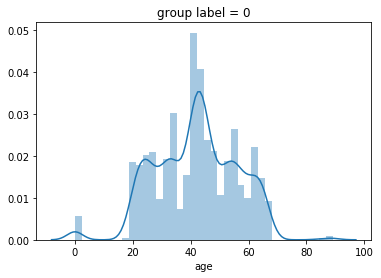

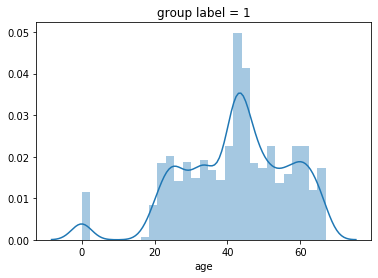

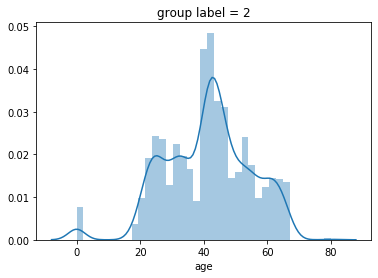

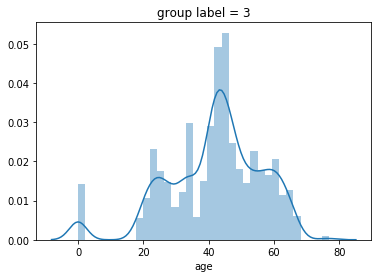

In [94]:
def eval_dist(df,col):
    for i in range(0,4):
        sns.distplot(df[df['group_labels']==i][col])
        plt.title(f'group label = {i}')
        plt.show()

eval_dist(df_final, 'age')

In [95]:
def eval_count_percent(df, col):
    for i in range(0,4):
        print(f'group label: {i}\n',
              df[df['group_labels']==i][col].value_counts()/
              len(df[df['group_labels']==i])*100,
              '\n')

eval_count_percent(df_final, 'age_buckets_labels')

group label: 0
 35-45    28.454431
45-55    19.214616
25-35    18.815624
55-65    16.400672
18-25    13.250735
>65       2.477950
0-18      1.385972
Name: age_buckets_labels, dtype: float64 

group label: 1
 35-45    27.610928
45-55    19.744236
55-65    18.213525
25-35    18.155396
18-25    10.850610
0-18      2.809533
>65       2.615772
Name: age_buckets_labels, dtype: float64 

group label: 2
 35-45    30.593297
45-55    20.063406
25-35    19.089674
55-65    14.447464
18-25    12.115036
0-18      1.856884
>65       1.834239
Name: age_buckets_labels, dtype: float64 

group label: 3
 35-45    28.579870
45-55    22.395115
55-65    17.431554
25-35    15.895214
18-25    10.911956
0-18      3.210557
>65       1.575734
Name: age_buckets_labels, dtype: float64 



In [96]:
df_final.columns

Index(['gender', 'past_3_years_bike_related_purchases',
       'job_industry_category', 'wealth_segment', 'owns_car', 'online_order',
       'order_status', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost', 'state',
       'age_buckets_labels', 'tenure_buckets_labels', 'age', 'tenure',
       'property_valuation', 'property_valuation_buckets_labels',
       'group_labels'],
      dtype='object')

In [97]:
New_customer.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [98]:
evaluate_columns = [col for col in df_final.columns if col in New_customer.columns]
evaluate_columns

['gender',
 'past_3_years_bike_related_purchases',
 'job_industry_category',
 'wealth_segment',
 'owns_car',
 'state',
 'tenure',
 'property_valuation']

In [99]:
eval_count_percent(df_final, 'gender')

group label: 0
 Female    52.078958
Male      46.451071
U          1.469971
Name: gender, dtype: float64 

group label: 1
 Female    51.424143
Male      45.921333
U          2.654524
Name: gender, dtype: float64 

group label: 2
 Male      50.430254
Female    47.916667
U          1.653080
Name: gender, dtype: float64 

group label: 3
 Female    48.965925
Male      47.922001
U          3.112074
Name: gender, dtype: float64 



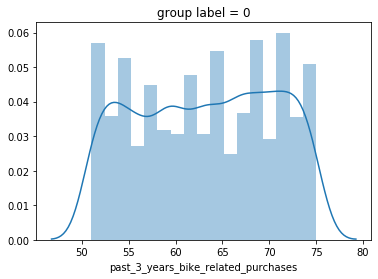

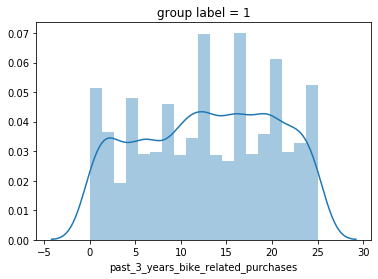

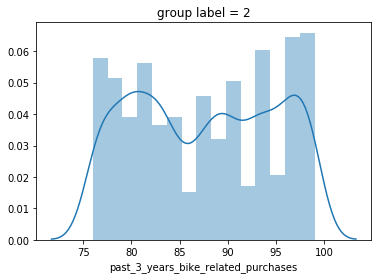

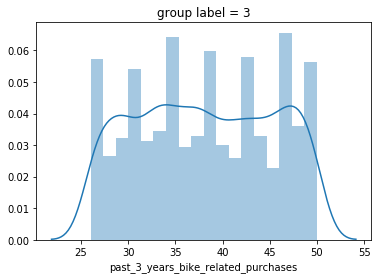

In [100]:
eval_dist(df_final, 'past_3_years_bike_related_purchases')

In [101]:
eval_count_percent(df_final, 'job_industry_category')

group label: 0
 Manufacturing         19.823604
Financial Services    17.240655
Health                17.051659
missing               16.190676
Retail                 9.848803
Property               6.404872
IT                     4.619908
Argiculture            3.821924
Entertainment          3.065939
Telecommunications     1.931961
Name: job_industry_category, dtype: float64 

group label: 1
 Financial Services    19.647355
Manufacturing         19.046696
missing               17.089711
Health                14.299554
Retail                 9.242395
IT                     6.180973
Property               5.754699
Entertainment          3.991475
Telecommunications     2.557644
Argiculture            2.189498
Name: job_industry_category, dtype: float64 

group label: 2
 Financial Services    20.584239
Manufacturing         20.176630
missing               16.938406
Health                16.281703
Retail                 7.993659
Property               6.363225
IT                     5.004

In [102]:
evaluate_columns

['gender',
 'past_3_years_bike_related_purchases',
 'job_industry_category',
 'wealth_segment',
 'owns_car',
 'state',
 'tenure',
 'property_valuation']

In [103]:
eval_count_percent(df_final, 'wealth_segment')

group label: 0
 Mass Customer        48.803024
High Net Worth       27.383452
Affluent Customer    23.813524
Name: wealth_segment, dtype: float64 

group label: 1
 Mass Customer        48.633986
High Net Worth       27.300911
Affluent Customer    24.065104
Name: wealth_segment, dtype: float64 

group label: 2
 Mass Customer        51.449275
Affluent Customer    25.928442
High Net Worth       22.622283
Name: wealth_segment, dtype: float64 

group label: 3
 Mass Customer        51.979515
High Net Worth       24.482962
Affluent Customer    23.537522
Name: wealth_segment, dtype: float64 



In [104]:
eval_count_percent(df_final, 'owns_car')

group label: 0
 Yes    51.154977
No     48.845023
Name: owns_car, dtype: float64 

group label: 1
 No     50.455338
Yes    49.544662
Name: owns_car, dtype: float64 

group label: 2
 Yes    50.724638
No     49.275362
Name: owns_car, dtype: float64 

group label: 3
 Yes    50.187118
No     49.812882
Name: owns_car, dtype: float64 



In [105]:
eval_count_percent(df_final, 'state')

group label: 0
 NSW    52.498950
VIC    23.960521
QLD    23.540529
Name: state, dtype: float64 

group label: 1
 NSW    52.761093
VIC    25.731447
QLD    21.507460
Name: state, dtype: float64 

group label: 2
 NSW    55.095109
VIC    24.003623
QLD    20.901268
Name: state, dtype: float64 

group label: 3
 NSW    53.338586
VIC    27.161710
QLD    19.499705
Name: state, dtype: float64 



In [106]:
evaluate_columns

['gender',
 'past_3_years_bike_related_purchases',
 'job_industry_category',
 'wealth_segment',
 'owns_car',
 'state',
 'tenure',
 'property_valuation']

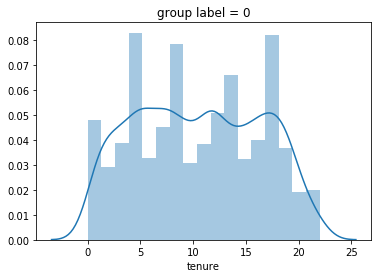

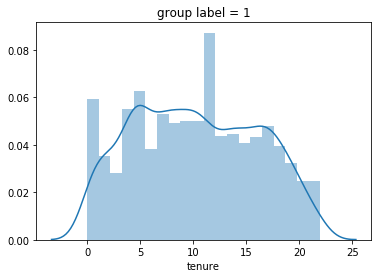

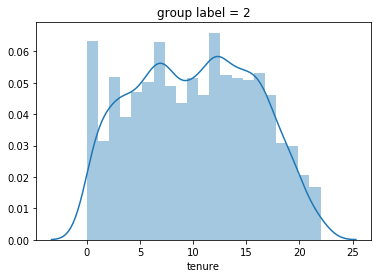

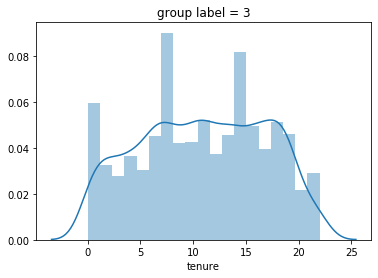

In [107]:
eval_dist(df_final, 'tenure')

In [108]:
eval_count_percent(df_final, 'tenure_buckets_labels')

group label: 0
 0-5      25.766485
5-10     24.338513
10-15    24.275514
15-20    23.057539
>20       2.561949
Name: tenure_buckets_labels, dtype: float64 

group label: 1
 5-10     26.448363
0-5      26.428987
10-15    23.774462
15-20    20.635536
>20       2.712653
Name: tenure_buckets_labels, dtype: float64 

group label: 2
 10-15    27.966486
5-10     26.924819
0-5      24.411232
15-20    18.931159
>20       1.766304
Name: tenure_buckets_labels, dtype: float64 

group label: 3
 5-10     25.507189
10-15    25.231436
15-20    24.187512
0-5      21.686035
>20       3.387827
Name: tenure_buckets_labels, dtype: float64 



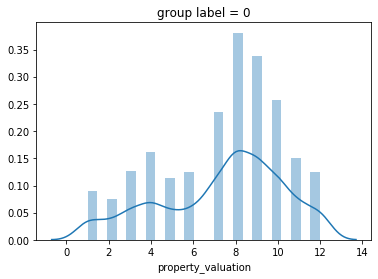

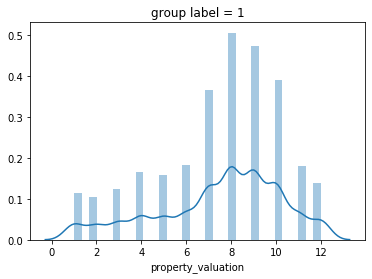

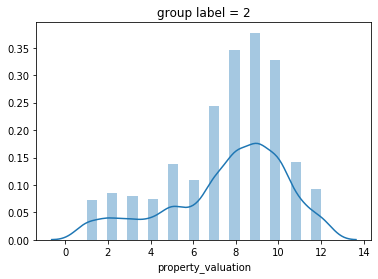

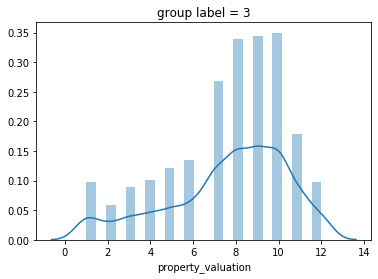

In [109]:
eval_dist(df_final, 'property_valuation')

In [110]:
eval_count_percent(df_final, 'property_valuation_buckets_labels')

group label: 0
 6-8     28.265435
8-10    27.278454
0-4     20.831583
>10     12.683746
4-6     10.940781
Name: property_valuation_buckets_labels, dtype: float64 

group label: 1
 6-8     29.955435
8-10    29.703546
0-4     17.535361
4-6     11.800039
>10     11.005619
Name: property_valuation_buckets_labels, dtype: float64 

group label: 2
 8-10    33.718297
6-8     28.238225
0-4     15.013587
4-6     11.843297
>10     11.186594
Name: property_valuation_buckets_labels, dtype: float64 

group label: 3
 8-10    31.790427
6-8     27.870790
0-4     15.855820
>10     12.724050
4-6     11.758913
Name: property_valuation_buckets_labels, dtype: float64 



In [111]:
evaluate_columns_left = [col for col in df_final.columns if col not in evaluate_columns]
evaluate_columns_left

['online_order',
 'order_status',
 'brand',
 'product_line',
 'product_class',
 'product_size',
 'list_price',
 'standard_cost',
 'age_buckets_labels',
 'tenure_buckets_labels',
 'age',
 'property_valuation_buckets_labels',
 'group_labels']

In [112]:
for col in ['online_order', 'brand', 'product_line', 'product_class', 'product_size']:
    eval_count_percent(df_final, col)

group label: 0
 1.0    50.335993
0.0    49.664007
Name: online_order, dtype: float64 

group label: 1
 0.0    50.125945
1.0    49.874055
Name: online_order, dtype: float64 

group label: 2
 1.0    50.203804
0.0    49.796196
Name: online_order, dtype: float64 

group label: 3
 1.0    50.049242
0.0    49.950758
Name: online_order, dtype: float64 

group label: 0
 Solex             21.650567
WeareA2B          16.610668
Giant Bicycles    16.106678
OHM Cycles        15.455691
Norco Bicycles    15.455691
Trek Bicycles     14.720706
Name: brand, dtype: float64 

group label: 1
 Solex             20.635536
Giant Bicycles    16.566557
WeareA2B          16.392172
Trek Bicycles     15.520248
OHM Cycles        15.500872
Norco Bicycles    15.384615
Name: brand, dtype: float64 

group label: 2
 Solex             21.829710
Giant Bicycles    17.595109
WeareA2B          16.666667
Trek Bicycles     15.285326
OHM Cycles        15.126812
Norco Bicycles    13.496377
Name: brand, dtype: float64 

group labe

In [113]:
def statistics(df, col_list):
    index=df[df.group_labels==0][col_list[0]].describe(percentiles=(0.25,0.5,0.75,0.9,0.99)).index
    stat=pd.DataFrame(index=index)
    for col in col_list:
        for i in range(0,4):
            values=df[df.group_labels==i][col].describe(percentiles=(0.25,0.5,0.75,0.9,0.99)).values
            stat[f'{col}_label_{i}']=values
    return stat

In [114]:
stat = statistics(df_final,['list_price','standard_cost'])

In [115]:
stat

list_price_label_0  list_price_label_1  list_price_label_2  \
count          4762.00000         5161.000000         4416.000000   
mean           1113.37281         1103.836972         1114.057543   
std             579.21362          582.950456          582.433130   
min              12.01000           12.010000           12.010000   
25%             586.45000          575.270000          586.450000   
50%            1172.78000         1163.890000         1163.890000   
75%            1635.30000         1577.530000         1635.300000   
90%            1842.92000         1873.970000         1873.970000   
99%            2091.47000         2091.470000         2091.470000   
max            2091.47000         2091.470000         2091.470000   

       list_price_label_3  standard_cost_label_0  standard_cost_label_1  \
count         5077.000000            4762.000000            5161.000000   
mean          1099.416325             564.115231             560.505437   
std            586.157023             404.386748             405.622868   
min             12.010000               7.210000               7.210000   
25%            575.270000             230.090000             230.090000   
50%           1163.890000             513.850000             507.580000   
75%           1577.530000             818.010000             795.100000   
90%           1873.970000            1105.750000            1105.750000   
99%           2091.470000            1610.900000            1670.480000   
max           2091.470000            1759.850000            1759.850000   

       standard_cost_label_2  standard_cost_label_3  
count            4416.000000            5077.000000  
mean              545.657917             551.334587  
std               402.660386             409.126758  
min                 7.210000               7.210000  
25%               215.140000             211.370000  
50%               459.710000             464.720000  
75%               778.690000             795.100000  
90%              1082.360000            1105.750000  
99%              1759.850000            1759.850000  
max              1759.850000            1759.850000

In [116]:
stat.loc[['count','mean','std']]

list_price_label_0  list_price_label_1  list_price_label_2  \
count          4762.00000         5161.000000         4416.000000   
mean           1113.37281         1103.836972         1114.057543   
std             579.21362          582.950456          582.433130   

       list_price_label_3  standard_cost_label_0  standard_cost_label_1  \
count         5077.000000            4762.000000            5161.000000   
mean          1099.416325             564.115231             560.505437   
std            586.157023             404.386748             405.622868   

       standard_cost_label_2  standard_cost_label_3  
count            4416.000000            5077.000000  
mean              545.657917             551.334587  
std               402.660386             409.126758

In [117]:
df_final.property_valuation_buckets_labels

0        8-10
1        8-10
2        8-10
3        8-10
4        8-10
5        8-10
6        8-10
7        8-10
8        8-10
9        8-10
10       8-10
11       8-10
12       8-10
13       8-10
14       8-10
15       8-10
16        0-4
17        0-4
18        0-4
19        0-4
20        0-4
21        0-4
22       8-10
23       8-10
24       8-10
25       8-10
26       8-10
27       8-10
28       8-10
29       8-10
30        0-4
31        0-4
32        0-4
33        0-4
34        0-4
35        0-4
36        0-4
37        0-4
38        0-4
39        >10
40        >10
41        >10
42        >10
43        >10
44        >10
45        6-8
46        6-8
47        6-8
48        6-8
49        6-8
50        0-4
51        0-4
52        0-4
53        0-4
54        0-4
55        0-4
56        0-4
57        4-6
58        4-6
59        4-6
60        4-6
61        4-6
62        4-6
63        4-6
64        6-8
65        6-8
66        6-8
67       8-10
68       8-10
69       8-10
70       8-10
71    

# Preprocessing the New Customer dataset to labels them in a group

In [118]:
New_customer.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [119]:
new_customers = New_customer.drop(['first_name', 'last_name', 'job_title', 'deceased_indicator', 'address', 'postcode',
                                  'country', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18','Unnamed: 19', 'Unnamed: 20',
                                   'Rank', 'Value'], axis=1)
new_customers.columns

Index(['gender', 'past_3_years_bike_related_purchases', 'DOB',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'state', 'property_valuation'],
      dtype='object')

In [120]:
new_customers.isnull().any()

gender                                 False
past_3_years_bike_related_purchases    False
DOB                                     True
job_industry_category                   True
wealth_segment                         False
owns_car                               False
tenure                                 False
state                                  False
property_valuation                     False
dtype: bool

In [121]:
new_customers.job_industry_category = new_customers.job_industry_category.fillna('missing')
new_customers.job_industry_category.unique()

array(['Manufacturing', 'Property', 'Financial Services', 'Entertainment',
       'Retail', 'IT', 'Telecommunications', 'Health', 'missing',
       'Argiculture'], dtype=object)

In [122]:
for var in ['gender', 'job_industry_category', 'wealth_segment', 'owns_car', 'state']:
    print(var,'\n',new_customers[var].unique(),'\n')

gender 
 ['Male' 'Female' 'U'] 

job_industry_category 
 ['Manufacturing' 'Property' 'Financial Services' 'Entertainment' 'Retail'
 'IT' 'Telecommunications' 'Health' 'missing' 'Argiculture'] 

wealth_segment 
 ['Mass Customer' 'Affluent Customer' 'High Net Worth'] 

owns_car 
 ['Yes' 'No'] 

state 
 ['QLD' 'NSW' 'VIC'] 



In [123]:
for var in ['gender', 'job_industry_category', 'wealth_segment', 'owns_car', 'state']:
    print(var,'\n',df_selected[var].unique(),'\n')

gender 
 ['Female' 'Male' 'U'] 

job_industry_category 
 ['Health' 'Financial Services' 'IT' 'missing' 'Retail' 'Argiculture'
 'Property' 'Manufacturing' 'Telecommunications' 'Entertainment'] 

wealth_segment 
 ['Mass Customer' 'Affluent Customer' 'High Net Worth'] 

owns_car 
 ['Yes' 'No'] 

state 
 ['NSW' 'QLD' 'VIC'] 



In [124]:
new_customers.gender = new_customers.gender.map({'M':'Male', 'F':'Female', 'U':'U'})
new_customers.gender.unique()

array([nan, 'U'], dtype=object)

In [125]:
def age(df, col):
    X=df.copy()
    X['year']=pd.DatetimeIndex(X[col]).year
    df['age'] = 2020-X['year']
    return df['age']

In [126]:
age(new_customers, 'DOB')

0      63.0
1      50.0
2      46.0
3      41.0
4      55.0
5      69.0
6      44.0
7      48.0
8      48.0
9      35.0
10     25.0
11     21.0
12     30.0
13     44.0
14     56.0
15     66.0
16     27.0
17     44.0
18     82.0
19     66.0
20     52.0
21     27.0
22     22.0
23     43.0
24     38.0
25     75.0
26     68.0
27     54.0
28     60.0
29     60.0
30     40.0
31     69.0
32     33.0
33     39.0
34     43.0
35     45.0
36     52.0
37     41.0
38     65.0
39     27.0
40     67.0
41     35.0
42     74.0
43     54.0
44     59.0
45     64.0
46     64.0
47     26.0
48     43.0
49     70.0
50     42.0
51     21.0
52     27.0
53     39.0
54     25.0
55     39.0
56     41.0
57     48.0
58     54.0
59      NaN
60     37.0
61     49.0
62     78.0
63     53.0
64     21.0
65     37.0
66     24.0
67     36.0
68     21.0
69     32.0
70     24.0
71     26.0
72     21.0
73     52.0
74     62.0
75     46.0
76     59.0
77     64.0
78     48.0
79     47.0
80     25.0
81     55.0
82     39.0
83  

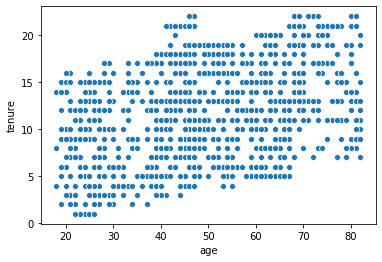

In [127]:
sns.scatterplot(new_customers.age, new_customers.tenure)

In [128]:
new_customers.age.isnull().sum()

17

In [129]:
list1=new_customers.groupby('tenure')['age'].mean().index
list2=new_customers.groupby('tenure')['age'].mean().values.round()

for tenure_, mean_age in zip(list1, list2):
    index = new_customers[(new_customers.tenure==tenure_) & (new_customers.age.isnull())].index
    if np.isnan(mean_age):
        new_customers.loc[index,'age']=0
    else:
        new_customers.loc[index,'age']=int(mean_age)
    print(new_customers.age.isnull().sum())

15
15
13
12
11
8
8
7
7
7
7
5
4
3
1
0
0
0
0
0
0
0
0


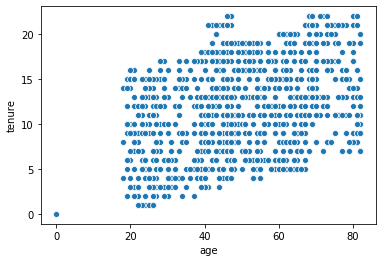

In [130]:
sns.scatterplot(new_customers.age, new_customers.tenure)

In [131]:
def buckets(df):
    df['age_buckets_labels'] = pd.cut(df['age'], bins=age_buckets, labels=age_labels, include_lowest=True)
    df['tenure_buckets_labels'] = pd.cut(df['tenure'], bins=tenure_buckets, labels=tenure_labels, include_lowest=True)
    df['property_valuation_buckets_labels'] = pd.cut(df['property_valuation'], bins=property_valuation_buckets,
                                                     labels=property_valuation_labels, include_lowest=True)
    
buckets(new_customers)

In [132]:
new_customers[['age_buckets_labels', 'tenure_buckets_labels', 'property_valuation_buckets_labels']].head()

age_buckets_labels tenure_buckets_labels property_valuation_buckets_labels
0              55-65                 10-15                               4-6
1              45-55                 15-20                               >10
2              45-55                  5-10                               4-6
3              35-45                   0-5                               0-4
4              45-55                 15-20                              8-10

In [133]:
final_new_customer=new_customers.drop(['age', 'tenure', 'property_valuation', 'DOB'], axis=1)

In [134]:
final_new_customer.isnull().any()

gender                                  True
past_3_years_bike_related_purchases    False
job_industry_category                  False
wealth_segment                         False
owns_car                               False
state                                  False
age_buckets_labels                     False
tenure_buckets_labels                  False
property_valuation_buckets_labels      False
dtype: bool

In [135]:
final_new_customer_dummies = pd.get_dummies(final_new_customer)

In [136]:
final_new_customer.shape, final_new_customer_dummies.shape

((1000, 9), (1000, 37))

# Grouping new customers into 4 sets

In [137]:
model.predict(final_new_customer_dummies)

ValueError: Incorrect number of features. Got 37 features, expected 39

In [ ]:
new_customers['group_labels'] = model.predict(final_new_customer_dummies)
new_customers.head()

In [ ]:
def Expected_no_of_customers(new_df, col, trained_df):
    for i in range(0,4):
        print(f'Attribute: {col} group label: {i}\n',
              round(trained_df[trained_df['group_labels']==i][col].value_counts()/
                    len(trained_df[trained_df['group_labels']==i])*
                    len(new_df[new_df['group_labels']==i])),
              '\n')

print('EXPECTED NUMBER OF CUSTOMERS BASED ON GROUPS AND ATTRIBUTES')
for col in ['online_order', 'brand', 'product_line', 'product_class', 'product_size']:
    Expected_no_of_customers(new_customers, col, df_final)

In [ ]:
with pd.ExcelWriter('data_insights.xlsx') as writer:  
    df_final.to_excel(writer, sheet_name='df_final', index=False)
    new_customers.to_excel(writer, sheet_name='new_customers', index=False)
    df.to_excel(writer, sheet_name='original_dataset', index=False)